In [ ]:
## Notebook env: mirtud_env (R kernel)
## learning rate was varied for the following four values 0.00002, 0.0002, 0.002, 0.02 -- note 0.002 is the default used previously
## following 5 parameter sets tested -- R K C T -- 1 1 1 1, 1 1 1 10*-10, 1 1 1 10*+10, 10k 1 1 10*-10, 10k 1 1 10*+10
## ie total 20 models run 
## batch size was set to total number of cells trained on in the model <2k

In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## UMAP data processing

In [2]:
path = '/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization'
umap_list = list()
select_parameters_tried = c('R1_K1_C1_T1', 'R1_K1_C1_T1e-10', 'R1_K1_C1_T10000000000', 'R10000_K1_C1_T1e-10', 'R10000_K1_C1_T10000000000')
learning_rates = c('0.0002', '0.002', '0.02', '0.00002')
for (i in 1:length(select_parameters_tried)){
  x = select_parameters_tried[i]
  files = paste(path, x, grep('UMAP-OF-MU.tsv.gz', grep('learning_rate', list.files(file.path(path, x)), value = TRUE), value = TRUE), sep = '/')
  umap_list[[i]] = lapply(files, function(x) {read.csv(x, sep = '\t', row.names = 1)})
  names(umap_list[[i]]) = paste0('lr_', learning_rates)
  umap_list[[i]] = umap_list[[i]][order(learning_rates)]
}

names(umap_list) = select_parameters_tried
umap_list = unlist(umap_list, recursive = FALSE)

In [3]:
names(umap_list)

[1] "R1_K1_C1_T1.lr_0.00002"              
 [2] "R1_K1_C1_T1.lr_0.0002"               
 [3] "R1_K1_C1_T1.lr_0.002"                
 [4] "R1_K1_C1_T1.lr_0.02"                 
 [5] "R1_K1_C1_T1e-10.lr_0.00002"          
 [6] "R1_K1_C1_T1e-10.lr_0.0002"           
 [7] "R1_K1_C1_T1e-10.lr_0.002"            
 [8] "R1_K1_C1_T1e-10.lr_0.02"             
 [9] "R1_K1_C1_T10000000000.lr_0.00002"    
[10] "R1_K1_C1_T10000000000.lr_0.0002"     
[11] "R1_K1_C1_T10000000000.lr_0.002"      
[12] "R1_K1_C1_T10000000000.lr_0.02"       
[13] "R10000_K1_C1_T1e-10.lr_0.00002"      
[14] "R10000_K1_C1_T1e-10.lr_0.0002"       
[15] "R10000_K1_C1_T1e-10.lr_0.002"        
[16] "R10000_K1_C1_T1e-10.lr_0.02"         
[17] "R10000_K1_C1_T10000000000.lr_0.00002"
[18] "R10000_K1_C1_T10000000000.lr_0.0002" 
[19] "R10000_K1_C1_T10000000000.lr_0.002"  
[20] "R10000_K1_C1_T10000000000.lr_0.02"

In [4]:
UMAP_output = umap_list

In [5]:
UMAP_output_2dims = list()
for (j in 1:length(UMAP_output)){
    guides = unique(UMAP_output[[j]]$guide)
    tmp_df = as.data.frame(matrix(0, nrow = nrow(UMAP_output[[j]]), ncol = length(guides)))
    colnames(tmp_df) = guides
    for (i in 1:length(guides)){
        guide_cells = UMAP_output[[j]]$guide == guides[i]
        vec = UMAP_output[[j]]$guide
        vec[guide_cells] = 'Guide'
        vec[!guide_cells] = 'N/A'
        tmp_df[,i] <- vec
    }
    UMAP_output_2dims[[j]] = cbind(UMAP_output[[j]], tmp_df)
}


In [6]:
head(UMAP_output_2dims[[1]])

UMAP1     UMAP2      guide                 
tRF_1:ATCCCTGCATTGAGGG-1 -6.539777 -4.3904580 tRNA-Met-CAT-(2)3-1.2t
tRF_2:TCGTAGAGTGTCCACG-1 -4.729168 -3.4709418 tRF_Trp_CCA_4         
tRF_2:TAACTTCGTTCCGCTT-1 -7.578218 -0.6024234 tRNA-Tyr-GTA-2-1.lh   
tRF_1:AGAACCTAGGGCCCTT-1 -7.678067 -3.4501250 tRNA-Arg-ACG-(3)1-1.2t
tRF_3:AGTCTCCTCGCTGACG-1 -7.426419 -0.9092987 tRNA-Thr-CGT-4-1.1t   
tRF_3:GGTCACGAGTCTAGAA-1 -7.720391 -3.2697418 tRNA-Tyr-GTA-2-1.lh   
                         tRNA-Met-CAT-(2)3-1.2t tRF_Trp_CCA_4
tRF_1:ATCCCTGCATTGAGGG-1 Guide                  N/A          
tRF_2:TCGTAGAGTGTCCACG-1 N/A                    Guide        
tRF_2:TAACTTCGTTCCGCTT-1 N/A                    N/A          
tRF_1:AGAACCTAGGGCCCTT-1 N/A                    N/A          
tRF_3:AGTCTCCTCGCTGACG-1 N/A                    N/A          
tRF_3:GGTCACGAGTCTAGAA-1 N/A                    N/A          
                         tRNA-Tyr-GTA-2-1.lh tRNA-Arg-ACG-(3)1-1.2t
tRF_1:ATCCCTGCATTGAGGG-1 N/A                 N/A                   
tRF_2:TCGTAGAGTGTCCACG-1 N/A                 N/A                   
tRF_2:TAACTTCGTTCCGCTT-1 Guide               N/A                   
tRF_1:AGAACCTAGGGCCCTT-1 N/A                 Guide                 
tRF_3:AGTCTCCTCGCTGACG-1 N/A                 N/A                   
tRF_3:GGTCACGAGTCTAGAA-1 Guide               N/A                   
                         tRNA-Thr-CGT-4-1.1t tRNA-SeC-TCA-1-1.2t
tRF_1:ATCCCTGCATTGAGGG-1 N/A                 N/A                
tRF_2:TCGTAGAGTGTCCACG-1 N/A                 N/A                
tRF_2:TAACTTCGTTCCGCTT-1 N/A                 N/A                
tRF_1:AGAACCTAGGGCCCTT-1 N/A                 N/A                
tRF_3:AGTCTCCTCGCTGACG-1 Guide               N/A                
tRF_3:GGTCACGAGTCTAGAA-1 N/A                 N/A                
                         tRNA-His-GTG-(9)1-1.2t ⋯ tRF_Gln_CTG_2
tRF_1:ATCCCTGCATTGAGGG-1 N/A                    ⋯ N/A          
tRF_2:TCGTAGAGTGTCCACG-1 N/A                    ⋯ N/A          
tRF_2:TAACTTCGTTCCGCTT-1 N/A                    ⋯ N/A          
tRF_1:AGAACCTAGGGCCCTT-1 N/A                    ⋯ N/A          
tRF_3:AGTCTCCTCGCTGACG-1 N/A                    ⋯ N/A          
tRF_3:GGTCACGAGTCTAGAA-1 N/A                    ⋯ N/A          
                         tRNA-Leu-TAA-3-1.2t tRNA-Arg-TCT-(2)3-1.2t
tRF_1:ATCCCTGCATTGAGGG-1 N/A                 N/A                   
tRF_2:TCGTAGAGTGTCCACG-1 N/A                 N/A                   
tRF_2:TAACTTCGTTCCGCTT-1 N/A                 N/A                   
tRF_1:AGAACCTAGGGCCCTT-1 N/A                 N/A                   
tRF_3:AGTCTCCTCGCTGACG-1 N/A                 N/A                   
tRF_3:GGTCACGAGTCTAGAA-1 N/A                 N/A                   
                         tRF_Ser_GCT_2 tRNA-Arg-CCT-4-1.3t
tRF_1:ATCCCTGCATTGAGGG-1 N/A           N/A                
tRF_2:TCGTAGAGTGTCCACG-1 N/A           N/A                
tRF_2:TAACTTCGTTCCGCTT-1 N/A           N/A                
tRF_1:AGAACCTAGGGCCCTT-1 N/A           N/A                
tRF_3:AGTCTCCTCGCTGACG-1 N/A           N/A                
tRF_3:GGTCACGAGTCTAGAA-1 N/A           N/A                
                         tRNA-Gly-CCC-(2)2-1.2t tRF_Ser_TGA.CGA_2
tRF_1:ATCCCTGCATTGAGGG-1 N/A                    N/A              
tRF_2:TCGTAGAGTGTCCACG-1 N/A                    N/A              
tRF_2:TAACTTCGTTCCGCTT-1 N/A                    N/A              
tRF_1:AGAACCTAGGGCCCTT-1 N/A                    N/A              
tRF_3:AGTCTCCTCGCTGACG-1 N/A                    N/A              
tRF_3:GGTCACGAGTCTAGAA-1 N/A                    N/A              
                         tRNA-Lys-CTT-11-1.2t tRF_Phe_GAA_2
tRF_1:ATCCCTGCATTGAGGG-1 N/A                  N/A          
tRF_2:TCGTAGAGTGTCCACG-1 N/A                  N/A          
tRF_2:TAACTTCGTTCCGCTT-1 N/A                  N/A          
tRF_1:AGAACCTAGGGCCCTT-1 N/A                  N/A          
tRF_3:AGTCTCCTCGCTGACG-1 N/A                  N/A          
tRF_3:GGTCACGAGTCT

In [7]:
plts2 <- list()
for (j in 1:length(UMAP_output_2dims)){
    plts2[[j]] <- list()
    for (i in 1:length(guides)){
        tmp <- UMAP_output_2dims[[j]][,c(1,2,(i+3))]
        colnames(tmp)[3] <- 'Type'
        tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
        if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
            plts2[[j]][[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point(size = 0.5) + 
            theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
            ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
        } else {
            plts2[[j]][[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point(size = 0.5) + 
            theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
            ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
        }
    }
}

In [8]:
library(ggpubr)
umap_plts <- list()
for (j in 1:length(plts2)){
    umap_plts[[j]] <- rep(list('empty'), ceiling(length(plts2[[j]])/25))
    for (i in 1:ceiling(length(plts2[[j]])/25)){
        umap_plts[[j]][[i]] <- ggarrange(plotlist = plts2[[j]][(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
    }
}


## UMAPS

[1] "R1_K1_C1_T1.lr_0.00002"

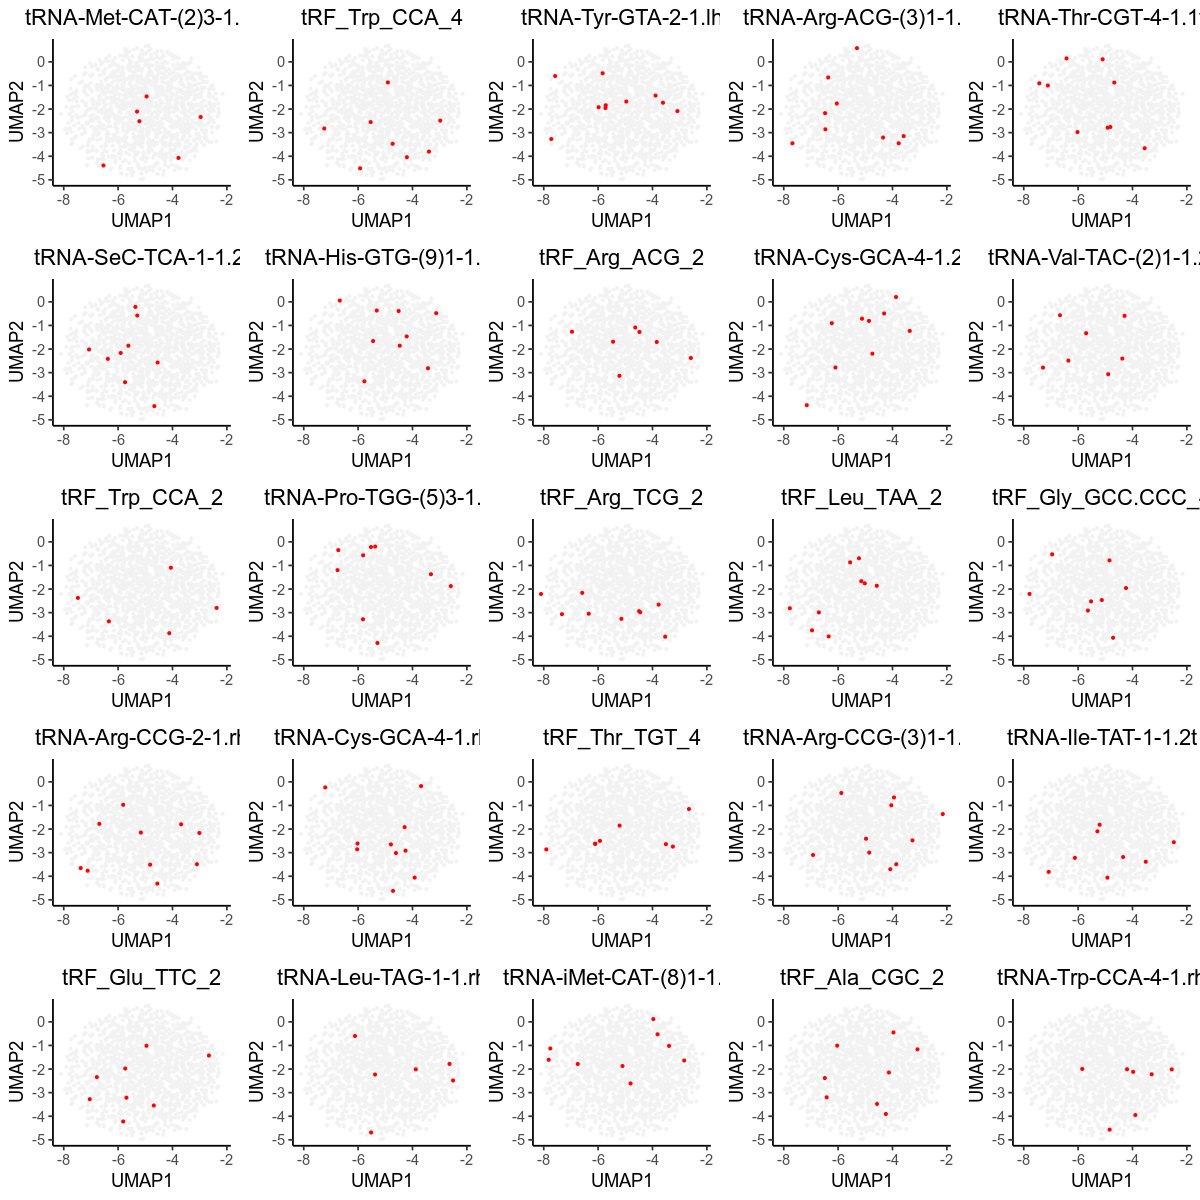

In [63]:
options(repr.plot.width=10, repr.plot.height=10)
names(umap_list)[1]
umap_plts[[1]][[1]]

[1] "R1_K1_C1_T1.lr_0.0002"

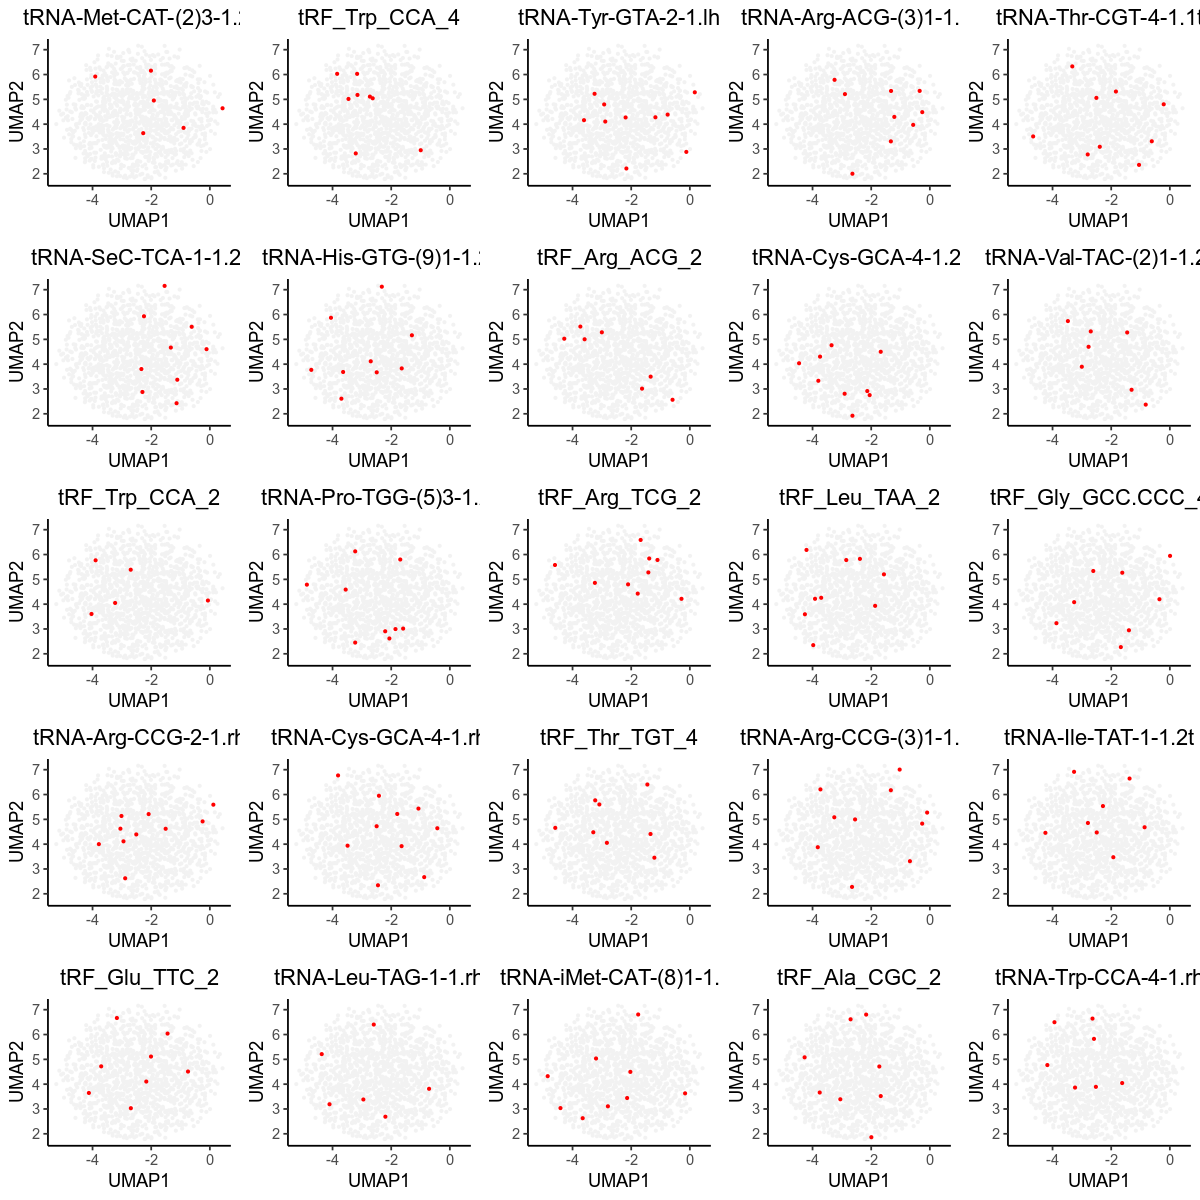

In [64]:
names(umap_list)[2]
umap_plts[[2]][[1]]

[1] "R1_K1_C1_T1.lr_0.002"

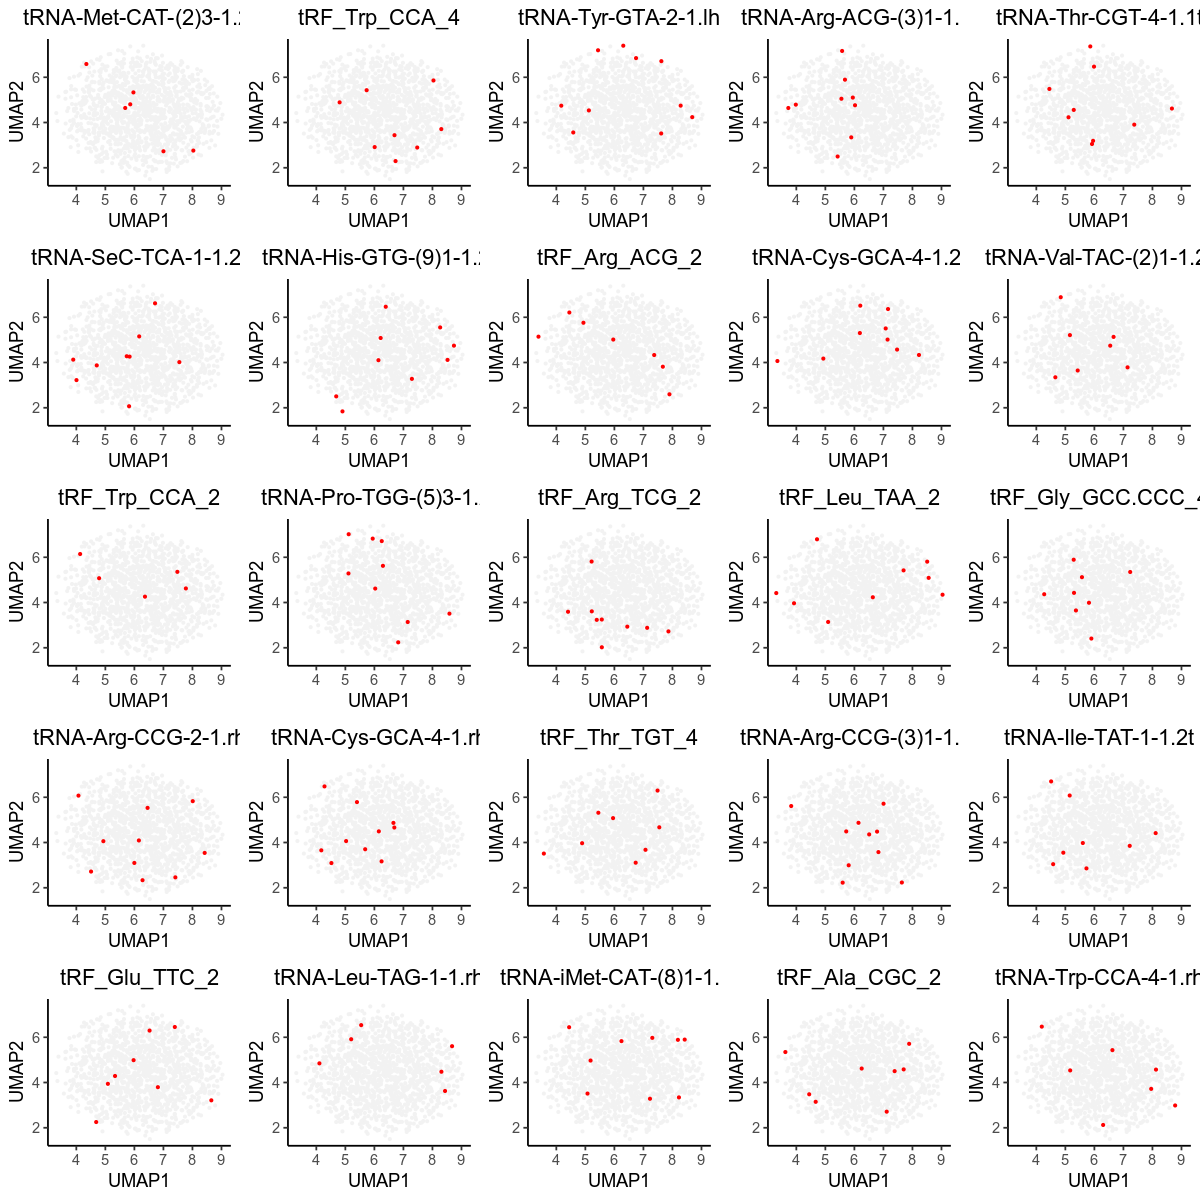

In [65]:
names(umap_list)[3]
umap_plts[[3]][[1]]

[1] "R1_K1_C1_T1.lr_0.02"

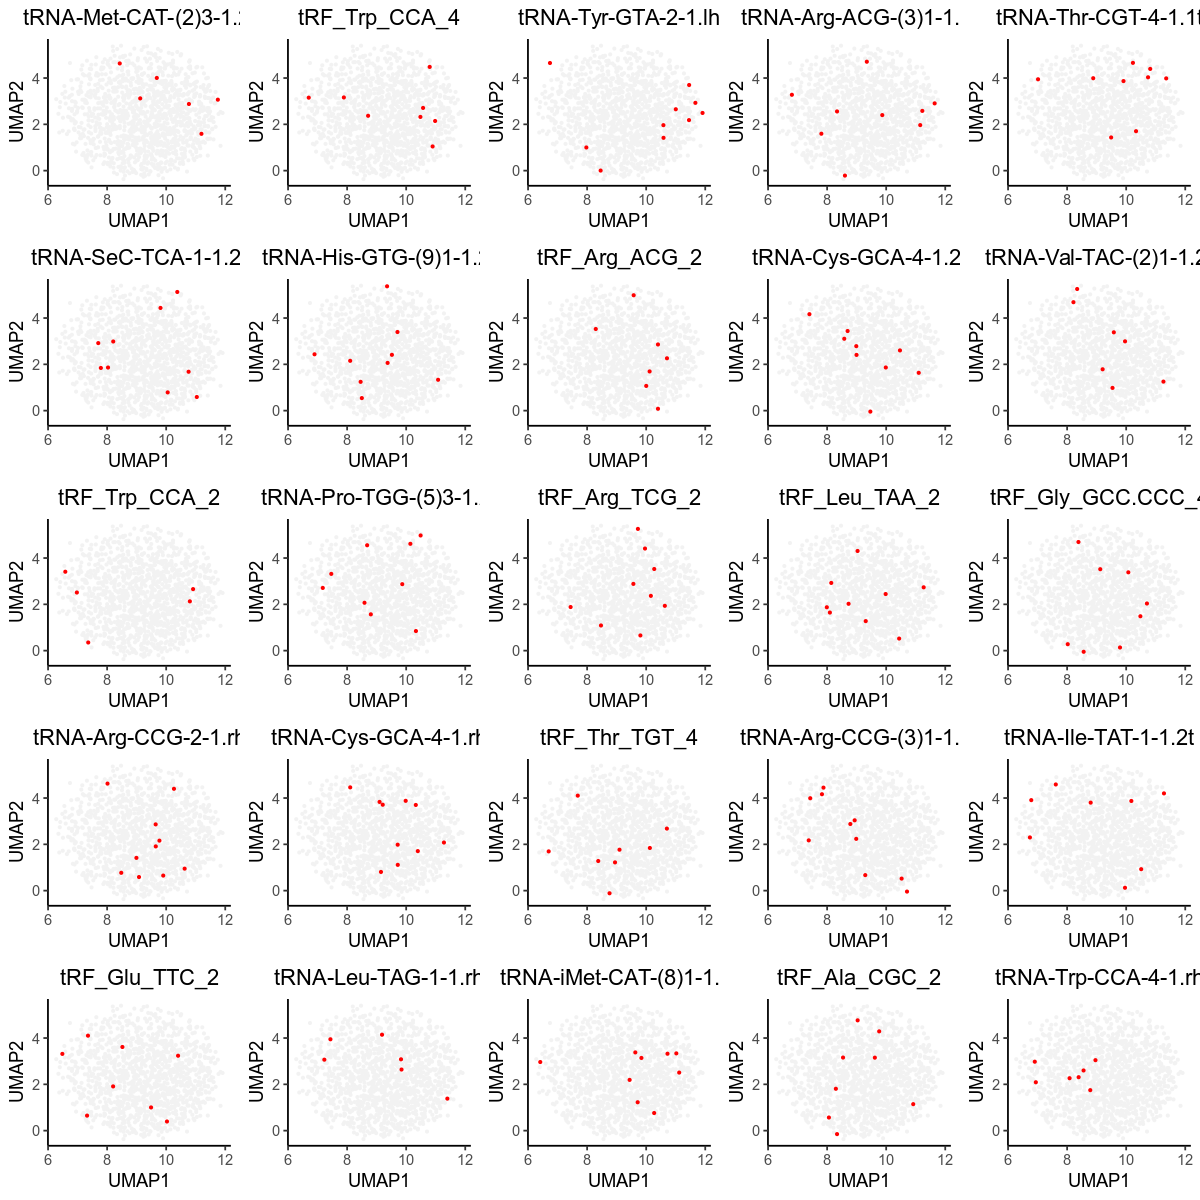

In [66]:
names(umap_list)[4]
umap_plts[[4]][[1]]

[1] "R1_K1_C1_T1e-10.lr_0.00002"

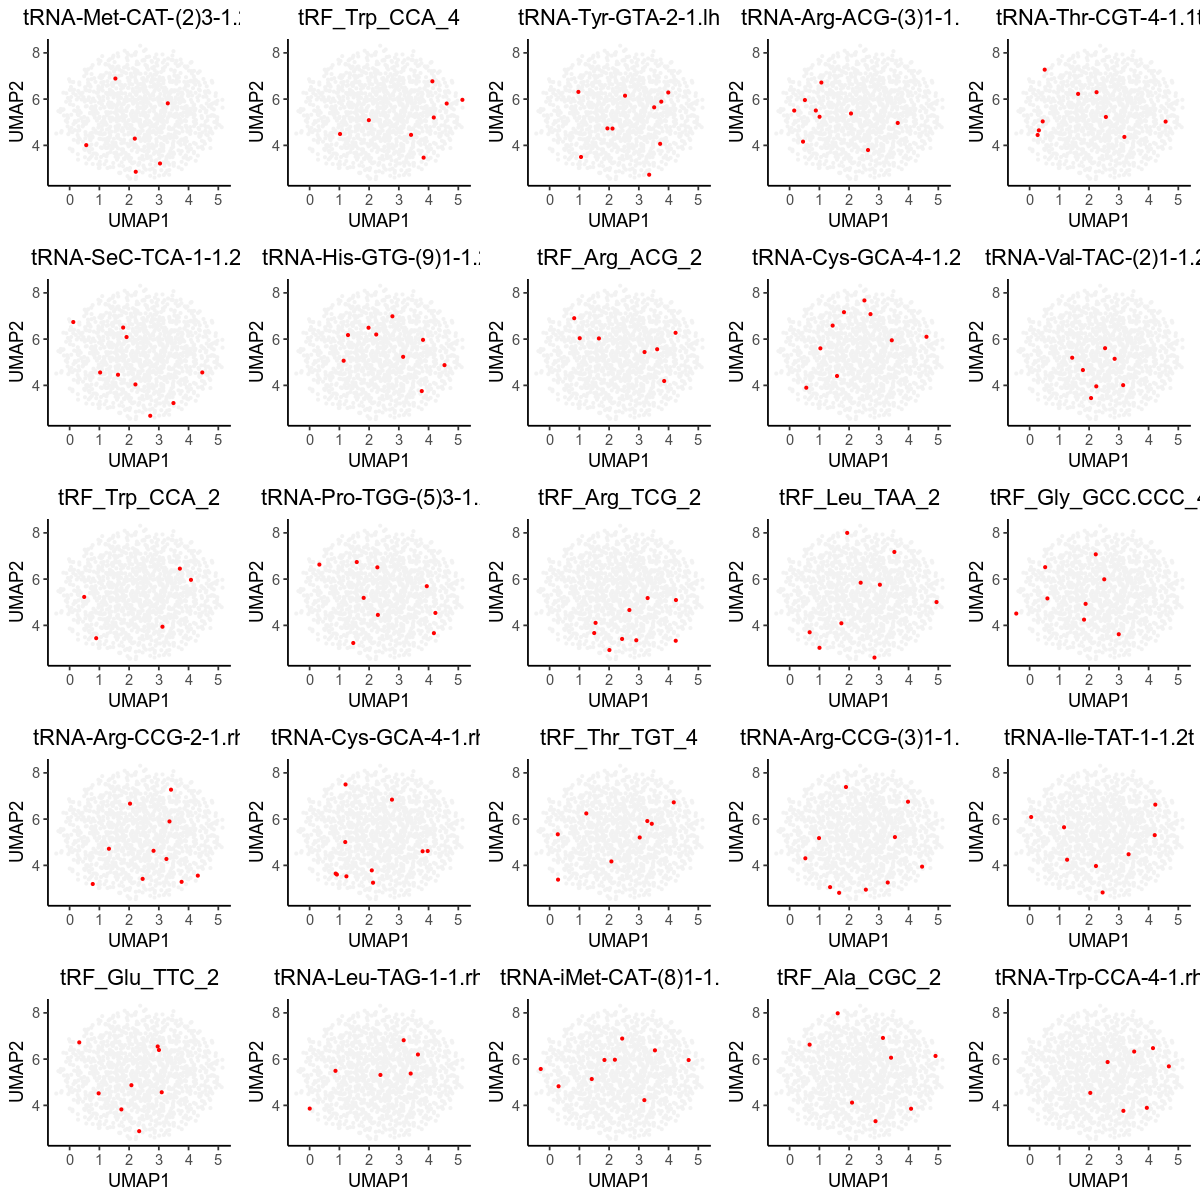

In [67]:
names(umap_list)[5]
umap_plts[[5]][[1]]

[1] "R1_K1_C1_T1e-10.lr_0.0002"

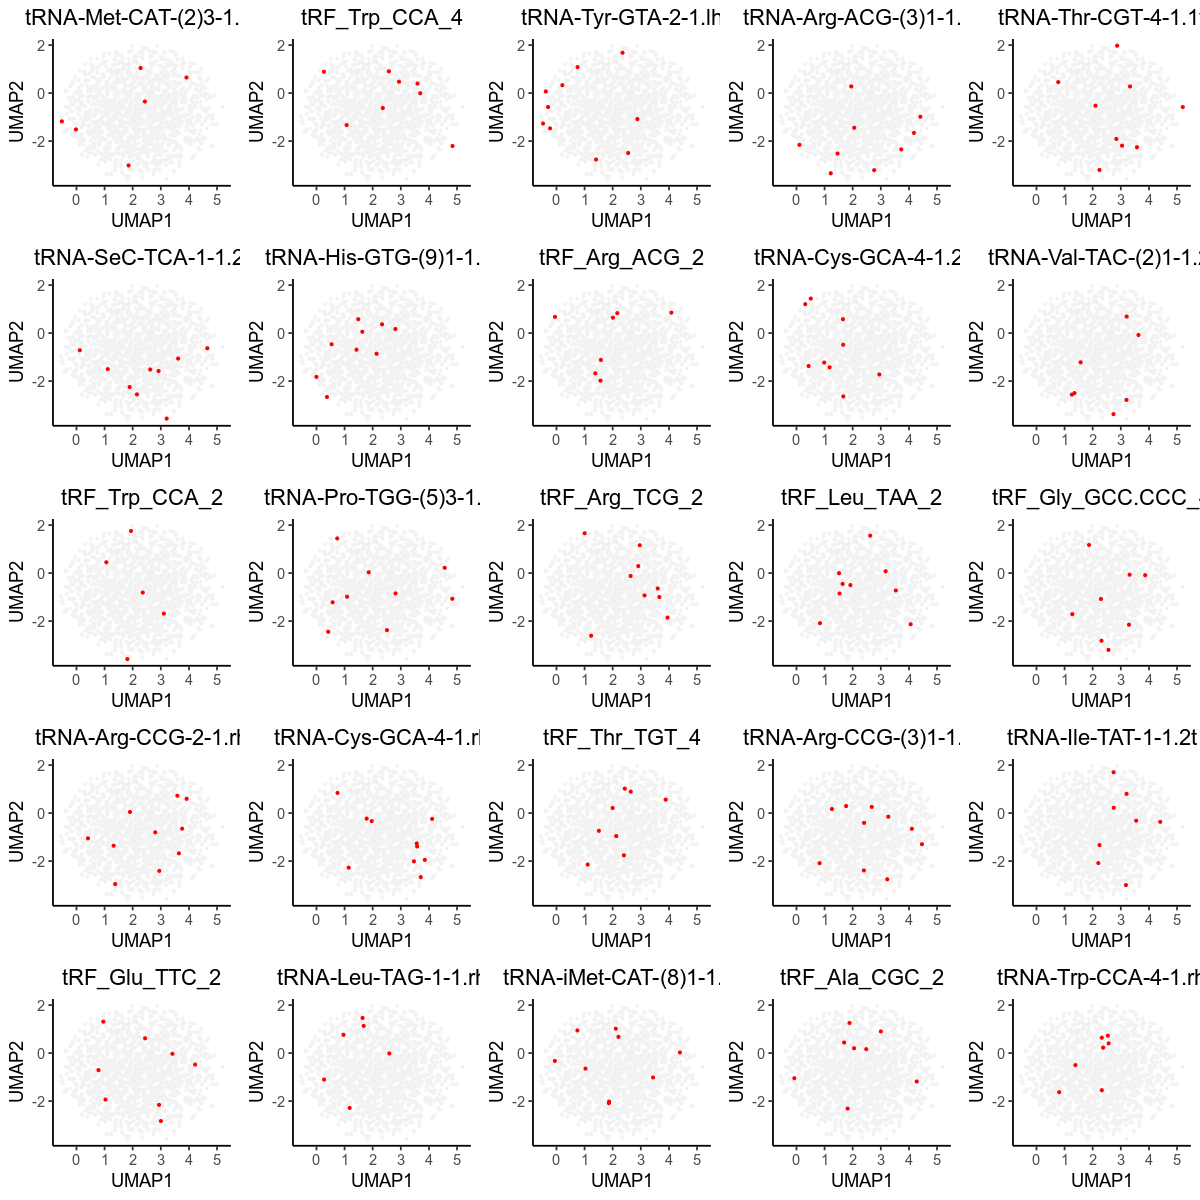

In [68]:
names(umap_list)[6]
umap_plts[[6]][[1]]

[1] "R1_K1_C1_T1e-10.lr_0.002"

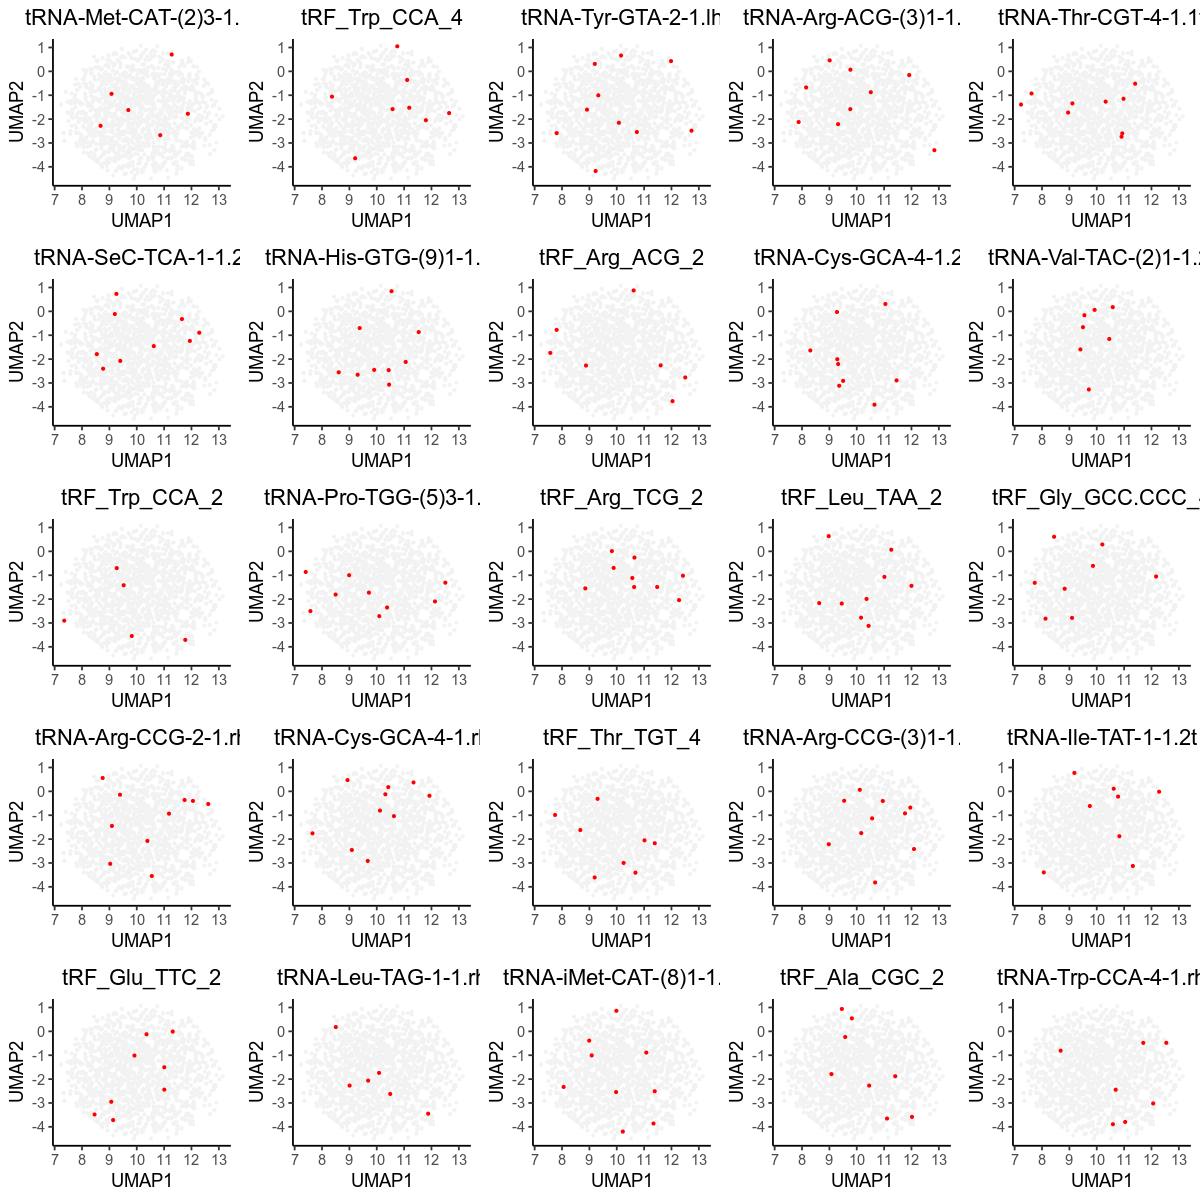

In [69]:
names(umap_list)[7]
umap_plts[[7]][[1]]

[1] "R1_K1_C1_T1e-10.lr_0.02"

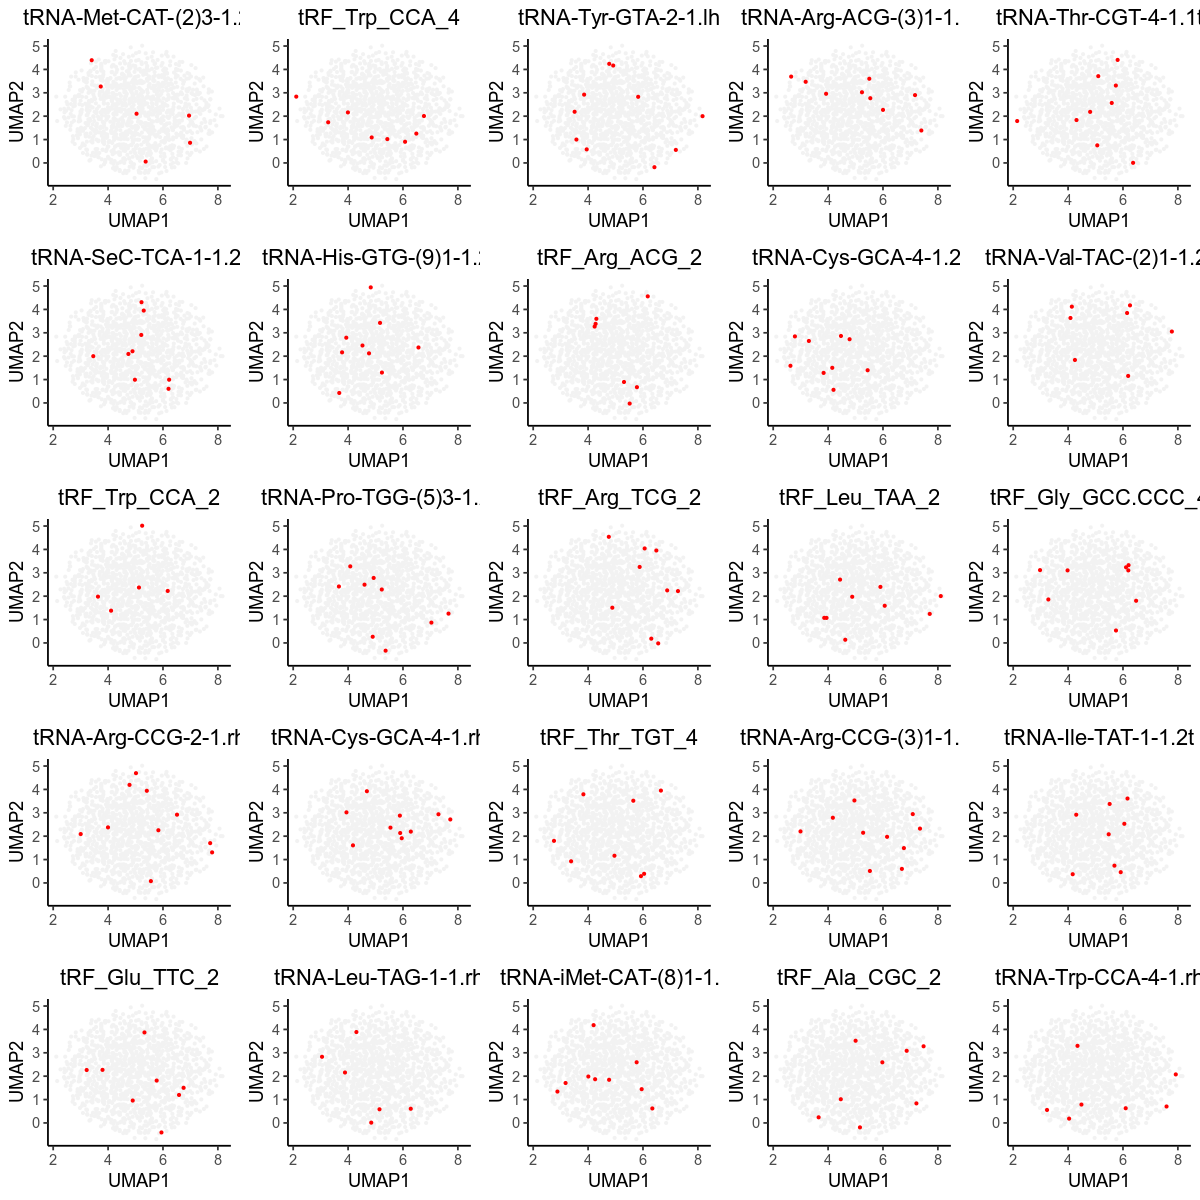

In [70]:
names(umap_list)[8]
umap_plts[[8]][[1]]

[1] "R1_K1_C1_T10000000000.lr_0.00002"

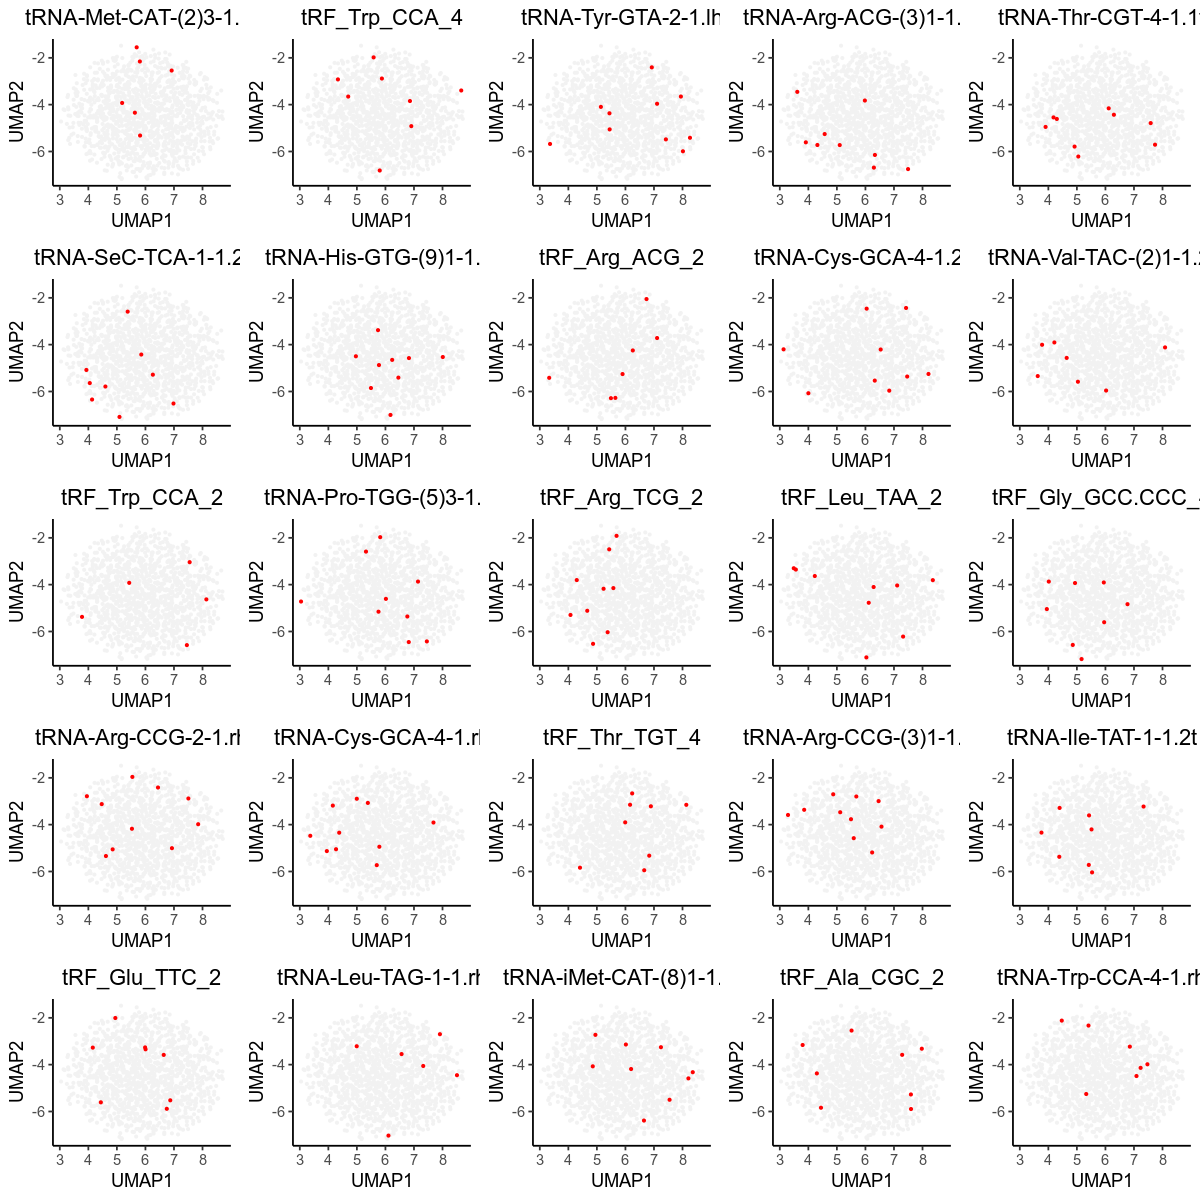

In [71]:
names(umap_list)[9]
umap_plts[[9]][[1]]

[1] "R1_K1_C1_T10000000000.lr_0.0002"

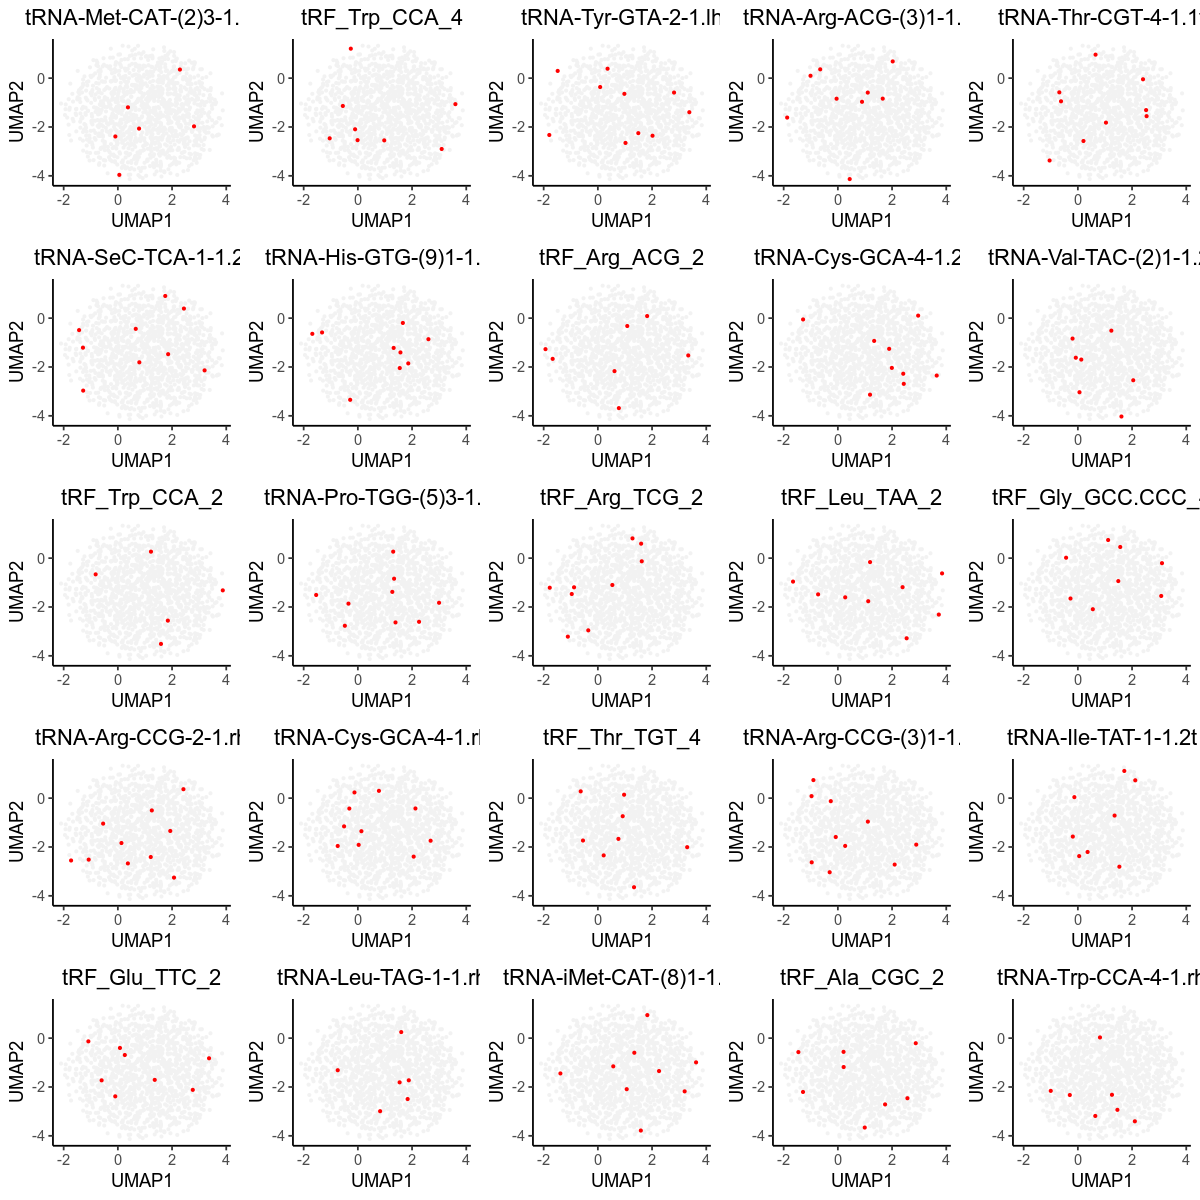

In [72]:
names(umap_list)[10]
umap_plts[[10]][[1]]

[1] "R1_K1_C1_T10000000000.lr_0.002"

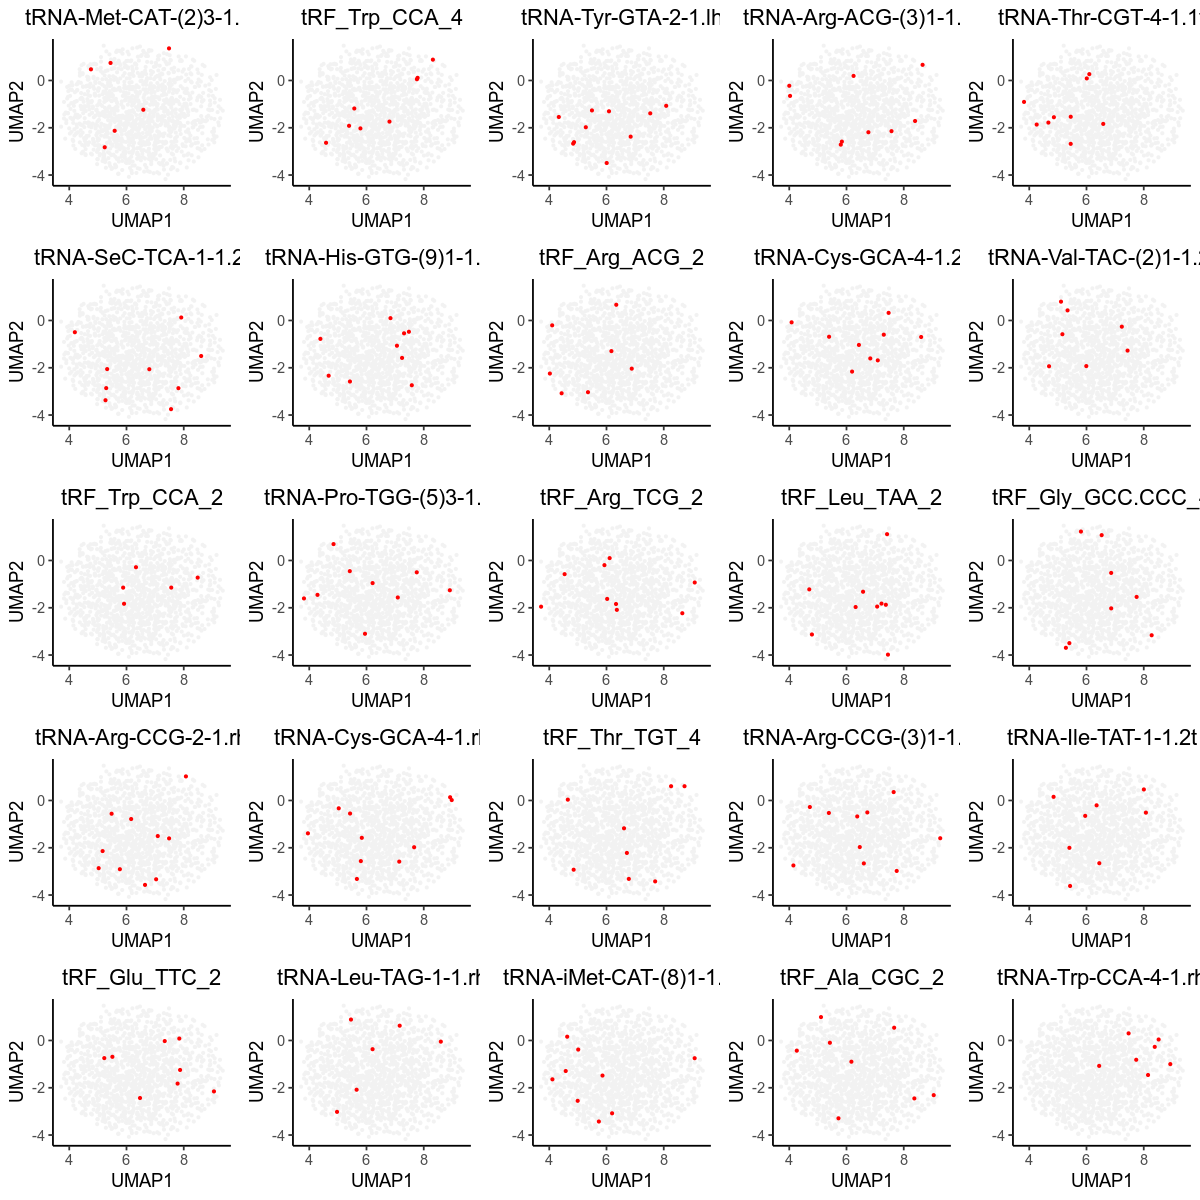

In [73]:
names(umap_list)[11]
umap_plts[[11]][[1]]

[1] "R1_K1_C1_T10000000000.lr_0.02"

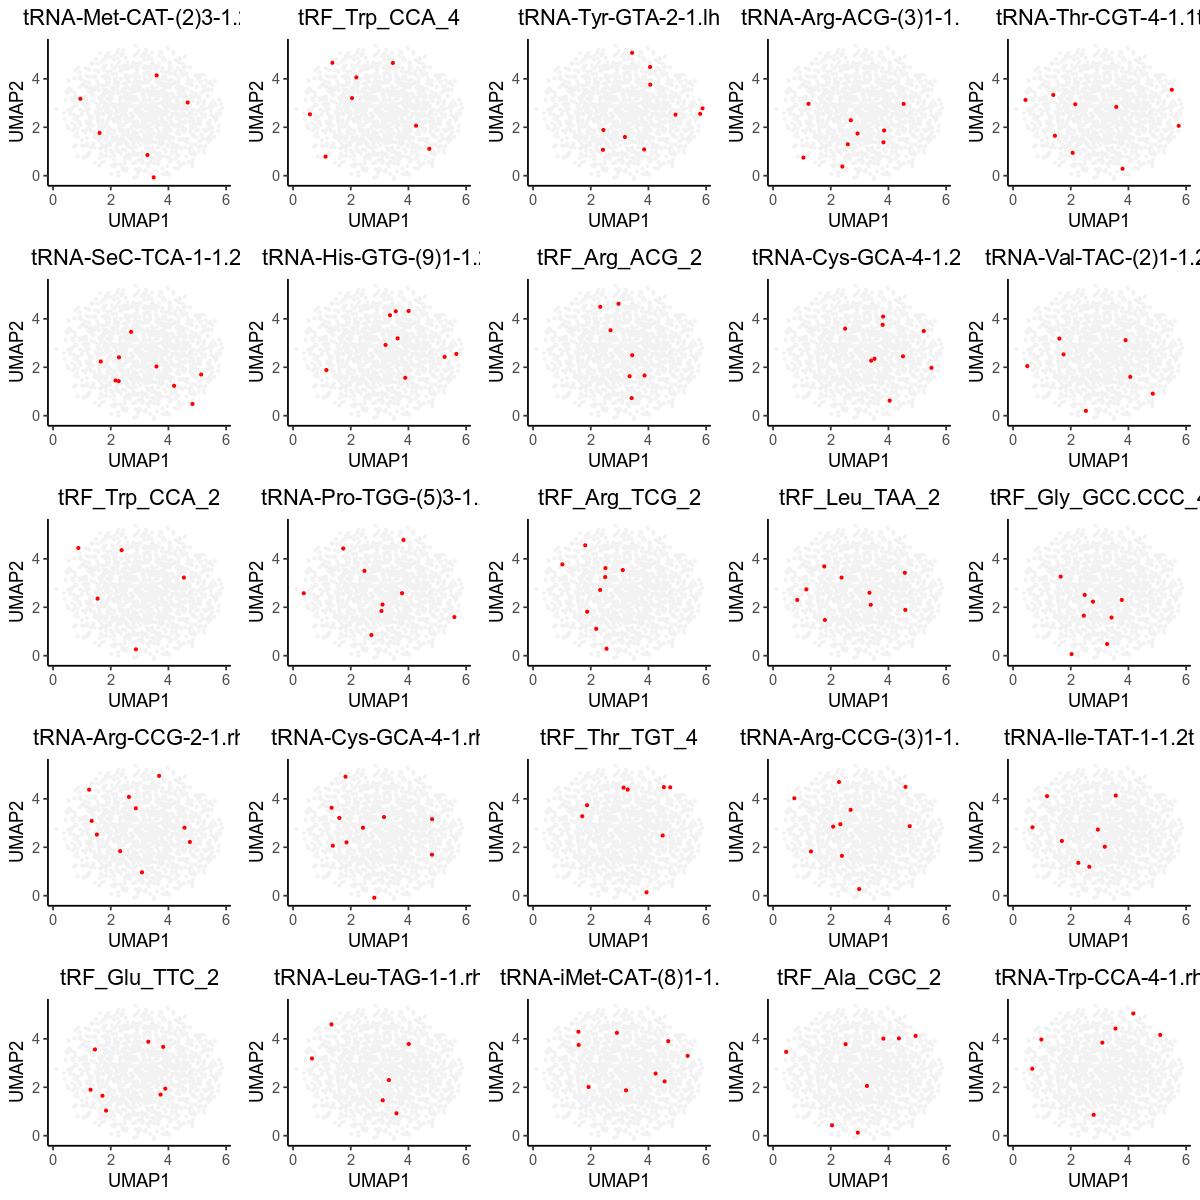

In [74]:
names(umap_list)[12]
umap_plts[[12]][[1]]

[1] "R10000_K1_C1_T1e-10.lr_0.00002"

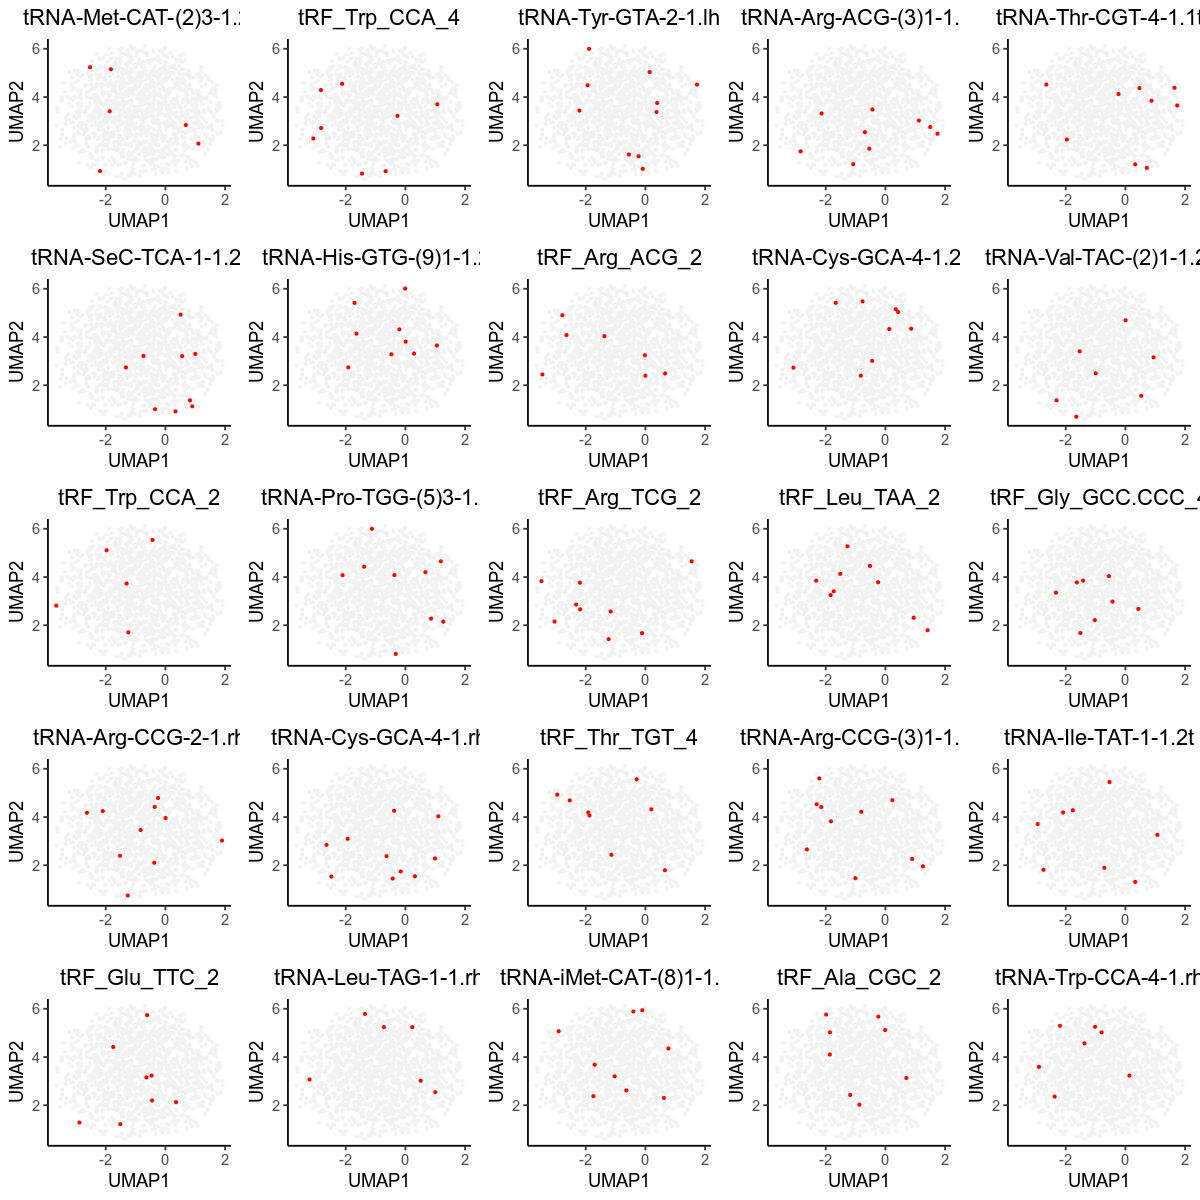

In [75]:
names(umap_list)[13]
umap_plts[[13]][[1]]

[1] "R10000_K1_C1_T1e-10.lr_0.0002"

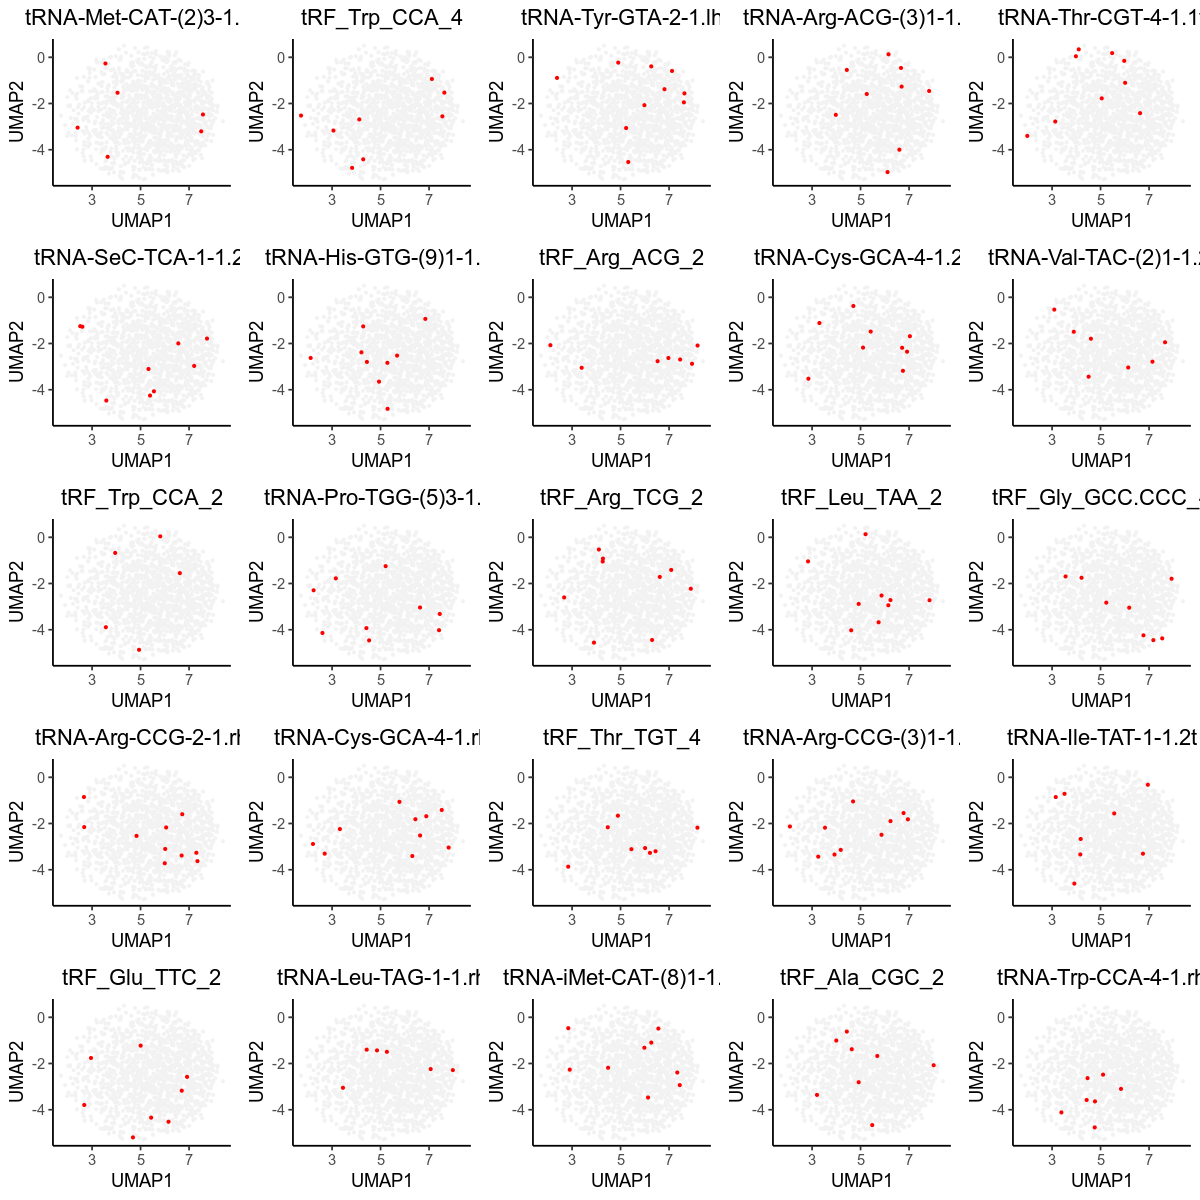

In [76]:
names(umap_list)[14]
umap_plts[[14]][[1]]

[1] "R10000_K1_C1_T1e-10.lr_0.002"

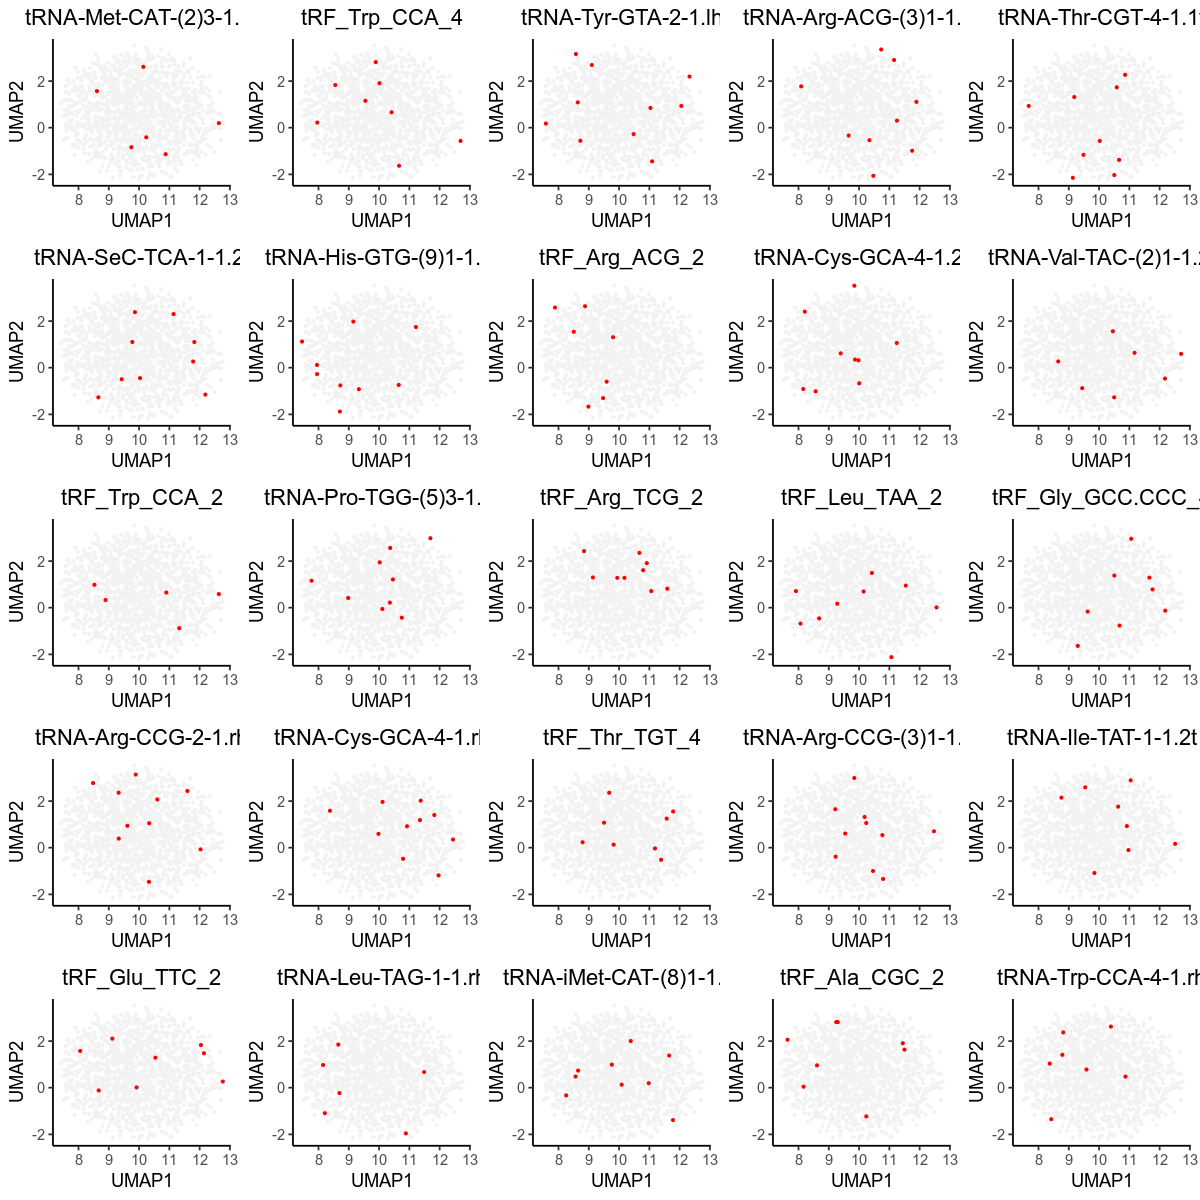

In [77]:
names(umap_list)[15]
umap_plts[[15]][[1]]

[1] "R10000_K1_C1_T1e-10.lr_0.02"

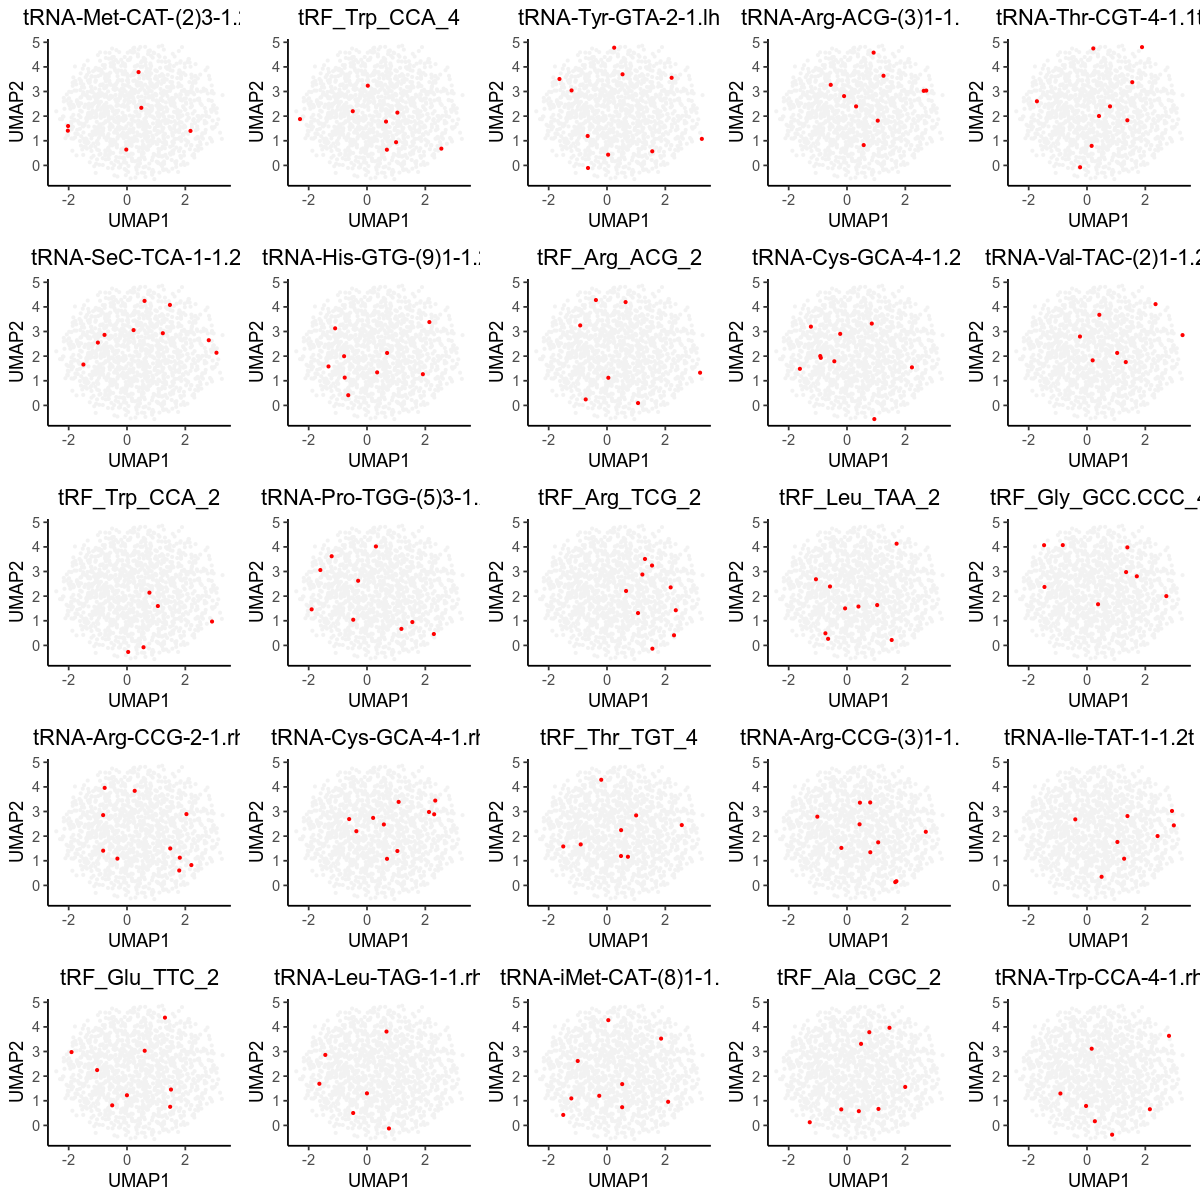

In [78]:
names(umap_list)[16]
umap_plts[[16]][[1]]

[1] "R10000_K1_C1_T10000000000.lr_0.00002"

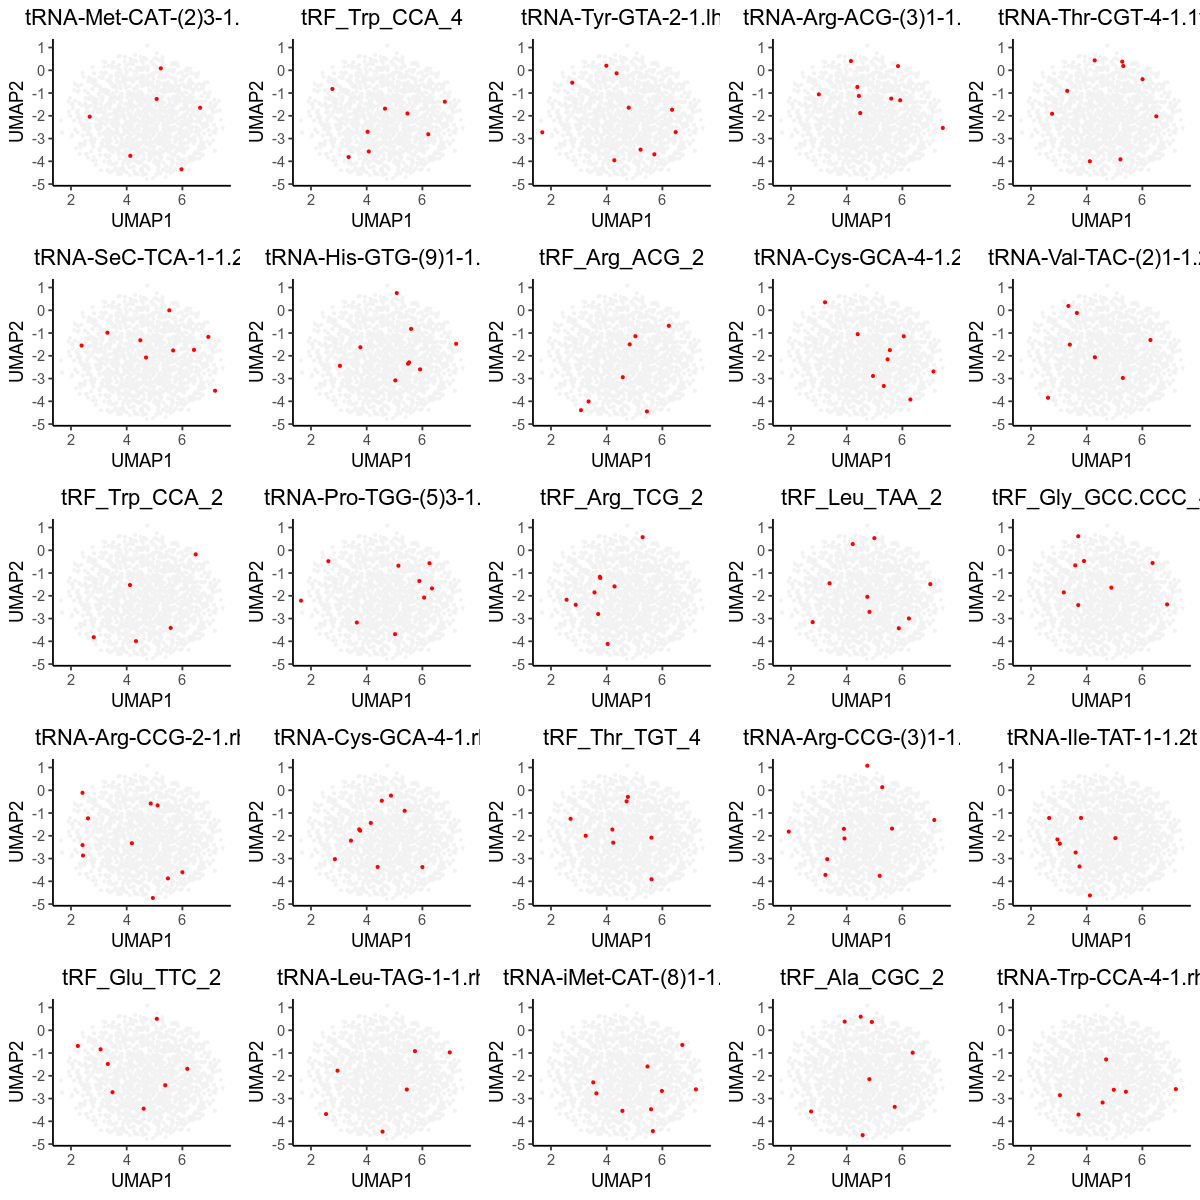

In [79]:
names(umap_list)[17]
umap_plts[[17]][[1]]

[1] "R10000_K1_C1_T10000000000.lr_0.0002"

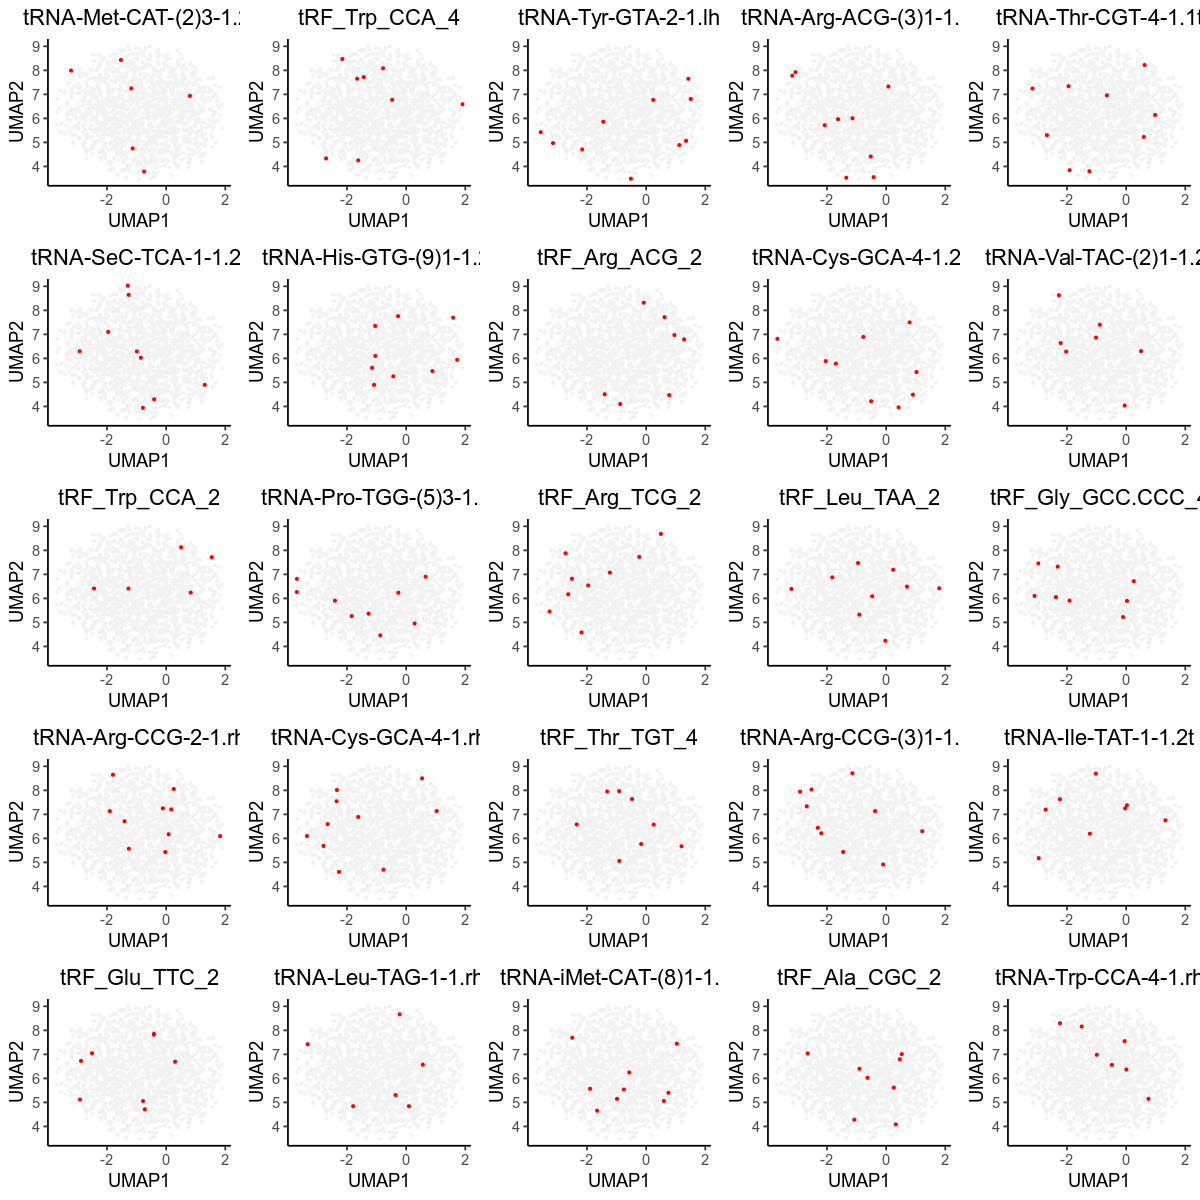

In [80]:
names(umap_list)[18]
umap_plts[[18]][[1]]

[1] "R10000_K1_C1_T10000000000.lr_0.002"

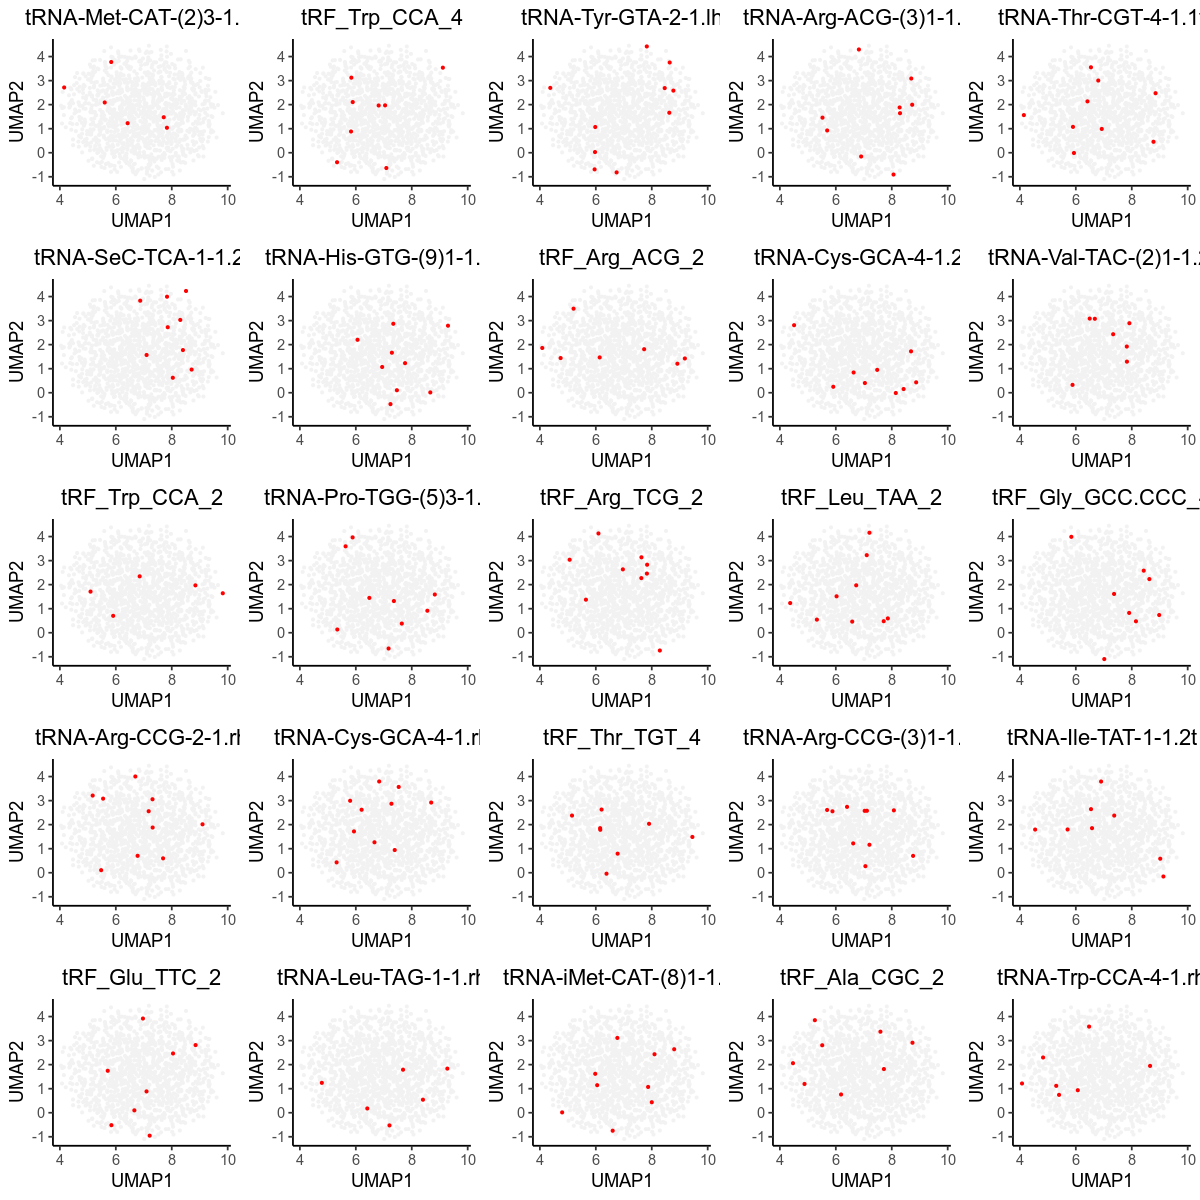

In [82]:
names(umap_list)[19]
umap_plts[[19]][[1]]

[1] "R10000_K1_C1_T10000000000.lr_0.02"

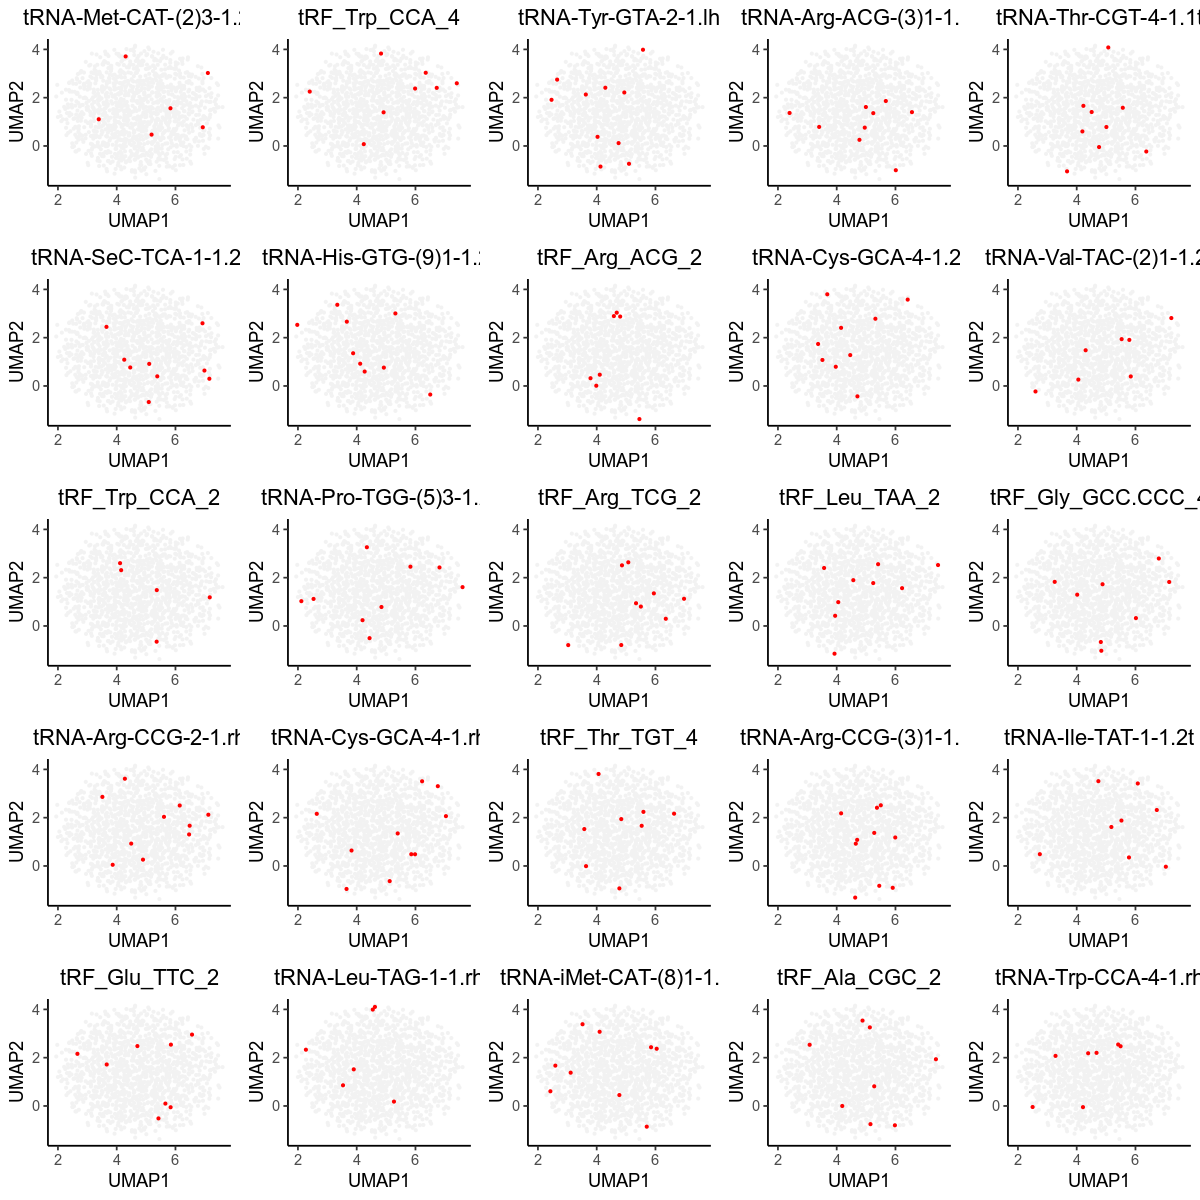

In [81]:
names(umap_list)[20]
umap_plts[[20]][[1]]

## Loss analysis

In [9]:
final_loss_list = list()
files = list.dirs(path, full.names = F, recursive = F)

final_total_loss_plots = list()
final_individual_loss_plots = list()

for (j in 1:length(select_parameters_tried)){
    x = select_parameters_tried[j]
    selected_files = paste(path, x, 'logs', grep('learning_rate', list.files(file.path(path, x, 'logs')), value = TRUE), sep = '/')
    loss_list = lapply(X = selected_files, FUN = read.csv, sep ='\t')
    individual_loss_list = list()
    total_loss_plots = list()
    individual_loss_plots = list()
    # files_with_info = file.info(list.files(paste0(file.path(path, files[i]), '/logs'), full.names = TRUE))
    # selected_file = rownames(files_with_info[with(files_with_info, order(as.POSIXct(mtime), decreasing = TRUE)), ])[1]
    for (i in 1:length(loss_list)){
        colnames(loss_list[[i]])[2] <- 'Total_Loss'
        loss_list[[i]]$Recon_Loss <- as.numeric(gsub(',', '', gsub('tensor\\(', '', sapply(strsplit(loss_list[[i]]$Recon_Loss, " "), "[[", 1))))
        loss_list[[i]]$KLD_Loss <- as.numeric(gsub(',', '', gsub('tensor\\(', '', sapply(strsplit(loss_list[[i]]$KLD_Loss, " "), "[[", 1))))
        loss_list[[i]]$Classification_Loss <- as.numeric(gsub(',', '', gsub('tensor\\(', '', sapply(strsplit(loss_list[[i]]$Classification_Loss, " "), "[[", 1))))
        loss_list[[i]]$Triplet_Loss <- as.numeric(gsub(',', '', gsub('tensor\\(', '', sapply(strsplit(loss_list[[i]]$Triplet_Loss, " "), "[[", 1))))
        loss_list[[i]][,3:6] <- apply(loss_list[[i]][,3:6], 2, as.numeric)
        loss_list[[i]]$Recon_Loss <- loss_list[[i]]$Recon_Loss/max(loss_list[[i]]$Recon_Loss)
        loss_list[[i]]$KLD_Loss <- loss_list[[i]]$KLD_Loss/max(loss_list[[i]]$KLD_Loss)
        loss_list[[i]]$Classification_Loss <- loss_list[[i]]$Classification_Loss/max(loss_list[[i]]$Classification_Loss)
        loss_list[[i]]$Triplet_Loss <- loss_list[[i]]$Triplet_Loss/max(loss_list[[i]]$Triplet_Loss)
        individual_loss_list[[i]] <- pivot_longer(loss_list[[i]], cols = 3:6, names_to = 'Loss_type', values_to = 'Loss')
        total_loss_plots[[i]] <- ggplot(loss_list[[i]], aes(Epoch, Total_Loss)) + geom_path() + theme_classic() + ggtitle(paste0(select_parameters_tried[j], '_lr_', learning_rates[i]))
        individual_loss_plots[[i]] <- ggplot(individual_loss_list[[i]], aes(Epoch, Loss, color = Loss_type)) + geom_path() + theme_classic() + ggtitle(paste0(select_parameters_tried[j], '_lr_', learning_rates[i]))
    }
    names(loss_list) = paste0('lr_', learning_rates)
    names(total_loss_plots) = paste0('lr_', learning_rates)
    names(individual_loss_plots) = paste0('lr_', learning_rates)
    loss_list = loss_list[order(learning_rates)]
    total_loss_plots = total_loss_plots[order(learning_rates)]
    individual_loss_plots = individual_loss_plots[order(learning_rates)]
    final_loss_list[[j]] = loss_list
    final_total_loss_plots[[j]] = total_loss_plots
    final_individual_loss_plots[[j]] = individual_loss_plots
    
}
names(final_loss_list) = select_parameters_tried
names(final_total_loss_plots) = select_parameters_tried
names(final_individual_loss_plots) = select_parameters_tried

final_loss_list = unlist(final_loss_list, recursive = FALSE)
final_total_loss_plots = unlist(final_total_loss_plots, recursive = FALSE)
final_individual_loss_plots = unlist(final_individual_loss_plots, recursive = FALSE)

names(final_individual_loss_plots)

[1] "R1_K1_C1_T1.lr_0.00002"              
 [2] "R1_K1_C1_T1.lr_0.0002"               
 [3] "R1_K1_C1_T1.lr_0.002"                
 [4] "R1_K1_C1_T1.lr_0.02"                 
 [5] "R1_K1_C1_T1e-10.lr_0.00002"          
 [6] "R1_K1_C1_T1e-10.lr_0.0002"           
 [7] "R1_K1_C1_T1e-10.lr_0.002"            
 [8] "R1_K1_C1_T1e-10.lr_0.02"             
 [9] "R1_K1_C1_T10000000000.lr_0.00002"    
[10] "R1_K1_C1_T10000000000.lr_0.0002"     
[11] "R1_K1_C1_T10000000000.lr_0.002"      
[12] "R1_K1_C1_T10000000000.lr_0.02"       
[13] "R10000_K1_C1_T1e-10.lr_0.00002"      
[14] "R10000_K1_C1_T1e-10.lr_0.0002"       
[15] "R10000_K1_C1_T1e-10.lr_0.002"        
[16] "R10000_K1_C1_T1e-10.lr_0.02"         
[17] "R10000_K1_C1_T10000000000.lr_0.00002"
[18] "R10000_K1_C1_T10000000000.lr_0.0002" 
[19] "R10000_K1_C1_T10000000000.lr_0.002"  
[20] "R10000_K1_C1_T10000000000.lr_0.02"

## Loss graphs

In [10]:
head(final_loss_list[[1]])

Epoch Total_Loss Recon_Loss KLD_Loss  Classification_Loss Triplet_Loss
1 0     Inf        1.0000000  0.9966284 0.9998233           0.9864761   
2 1     Inf        0.9993485  1.0000000 0.9997448           0.9709380   
3 2     Inf        0.9985248  0.9927969 1.0000000           0.9687320   
4 3     Inf        0.9973803  0.9837548 0.9997841           0.9751583   
5 4     Inf        0.9961623  0.9832950 0.9997448           0.9796662   
6 5     Inf        0.9956121  0.9754789 1.0000000           0.9807213   
  MiniBatch.ID Time.Stamp                
1 0            2024-04-18 22:43:35.032891
2 0            2024-04-18 22:43:41.203984
3 0            2024-04-18 22:43:46.332030
4 0            2024-04-18 22:43:52.422312
5 0            2024-04-18 22:44:01.123687
6 0            2024-04-18 22:44:07.978382

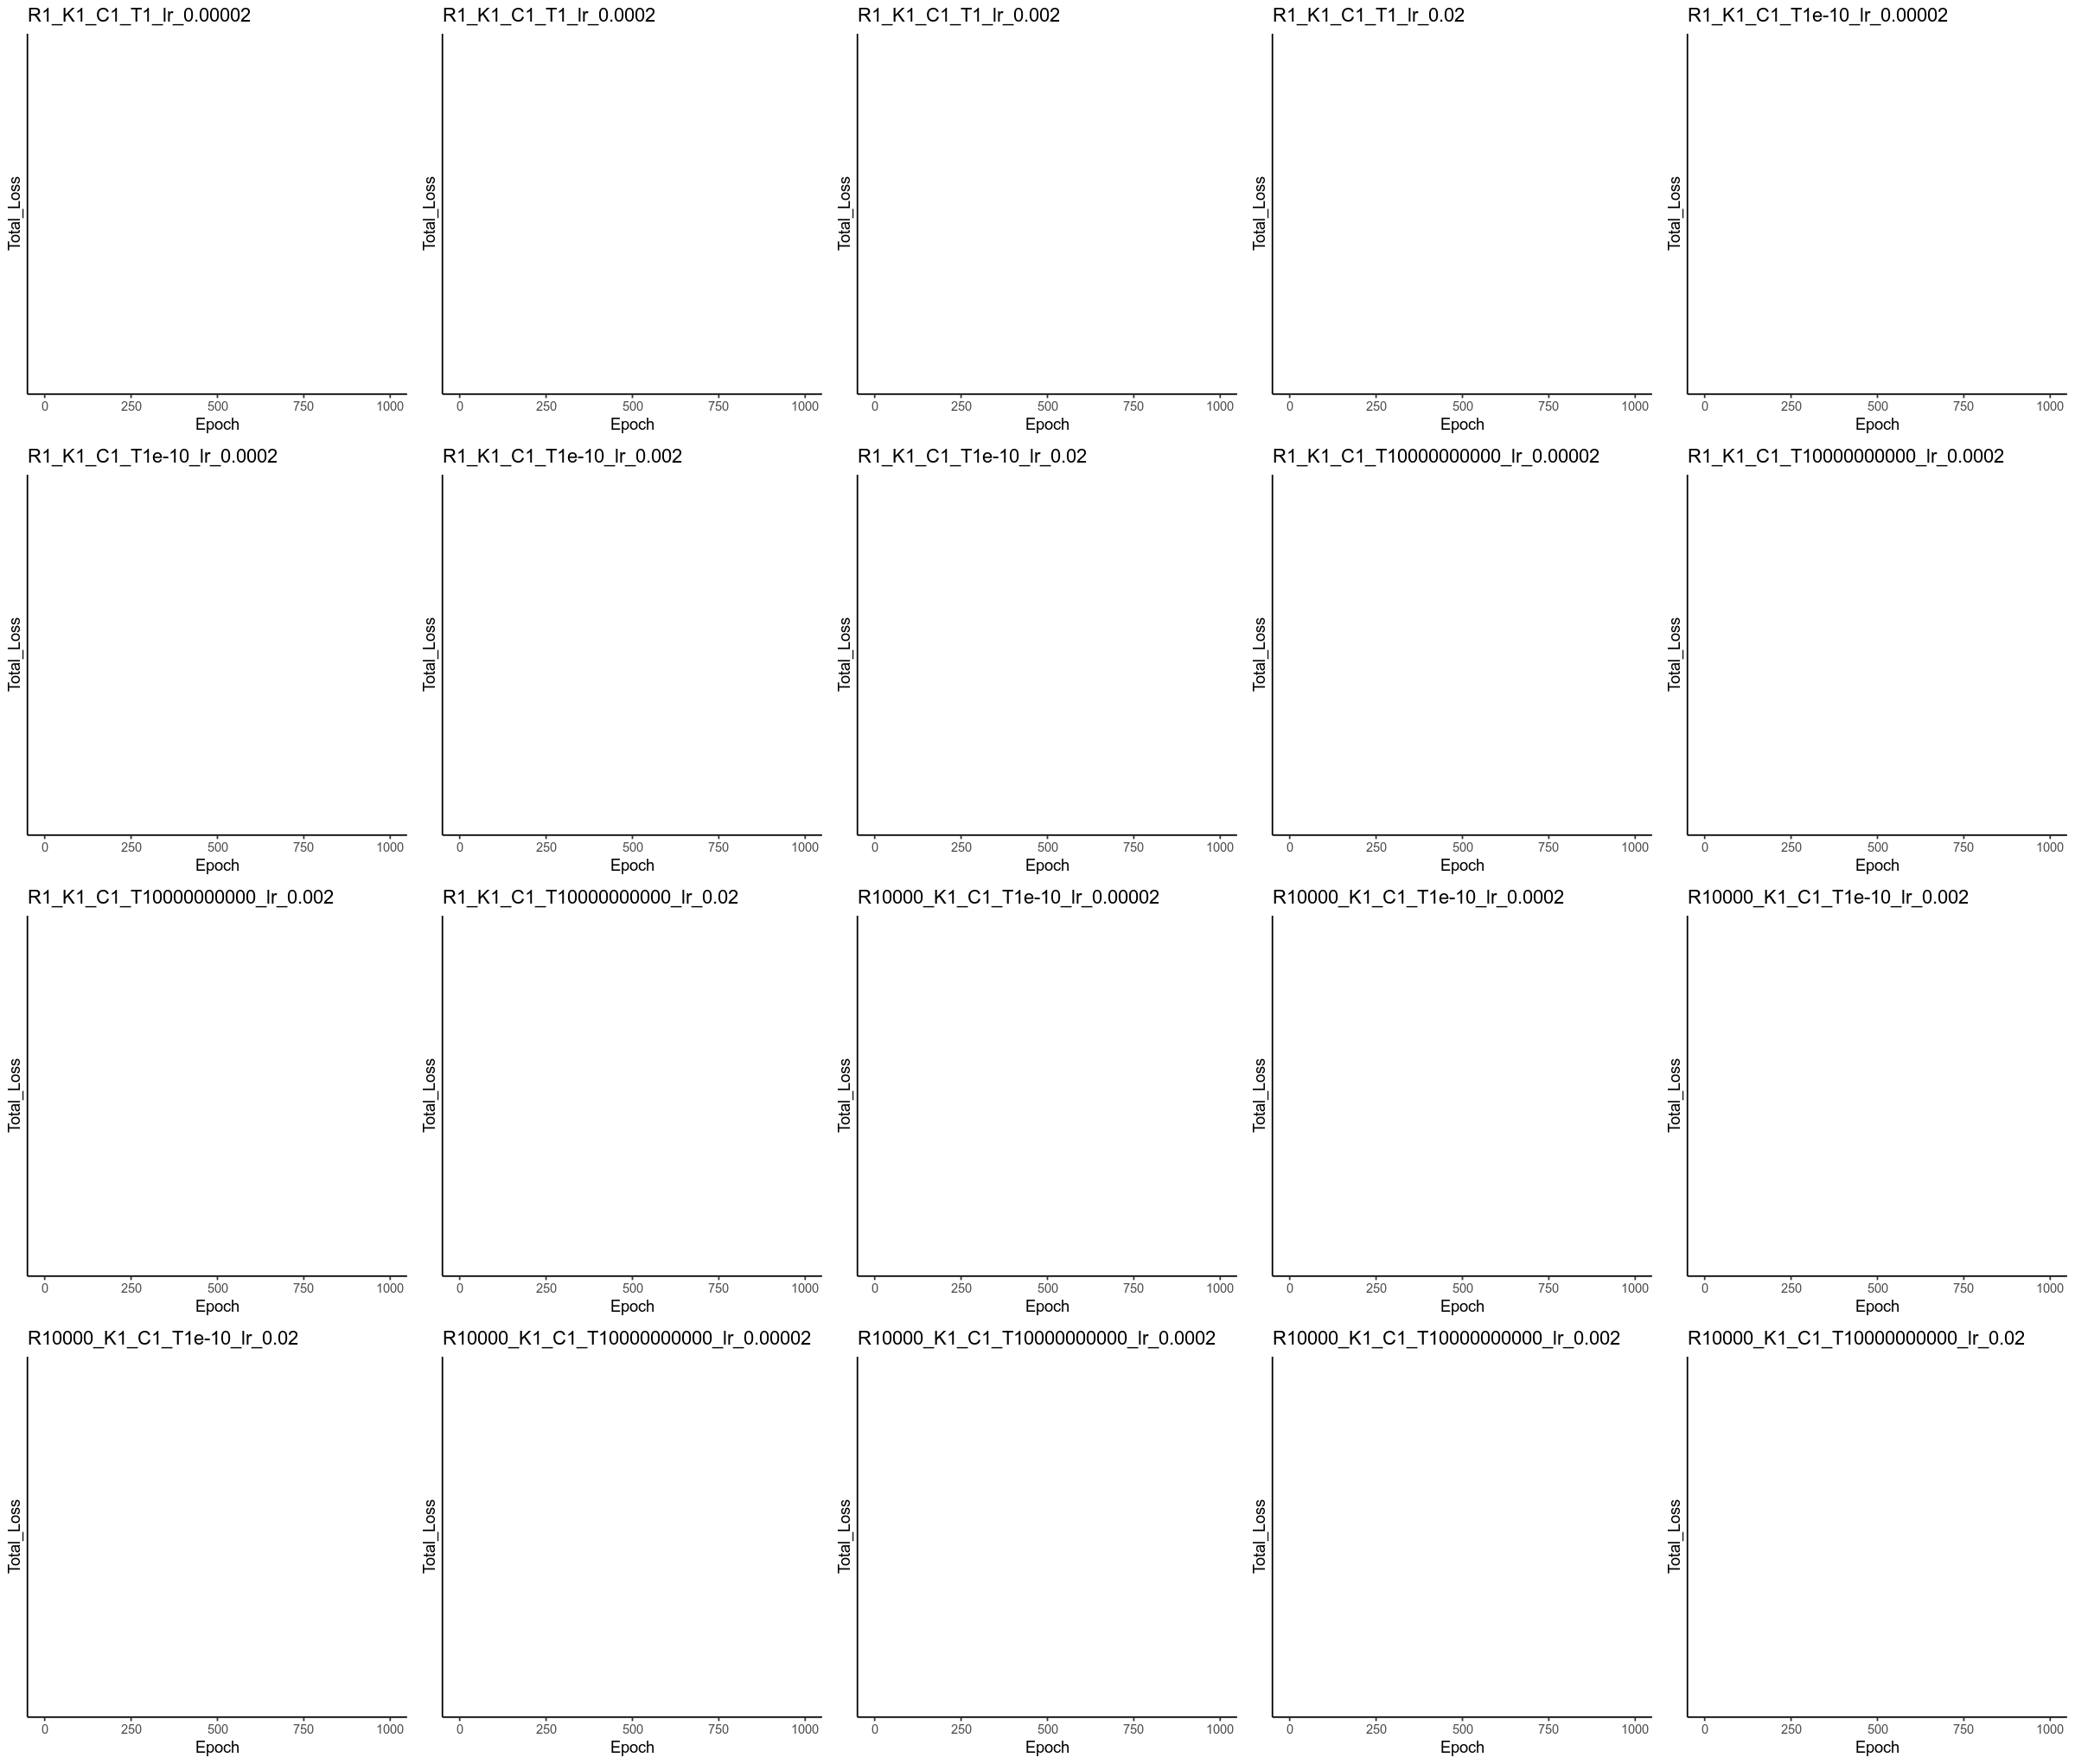

In [11]:
options(repr.plot.width=20, repr.plot.height=17)
ggpubr::ggarrange(plotlist = final_total_loss_plots)

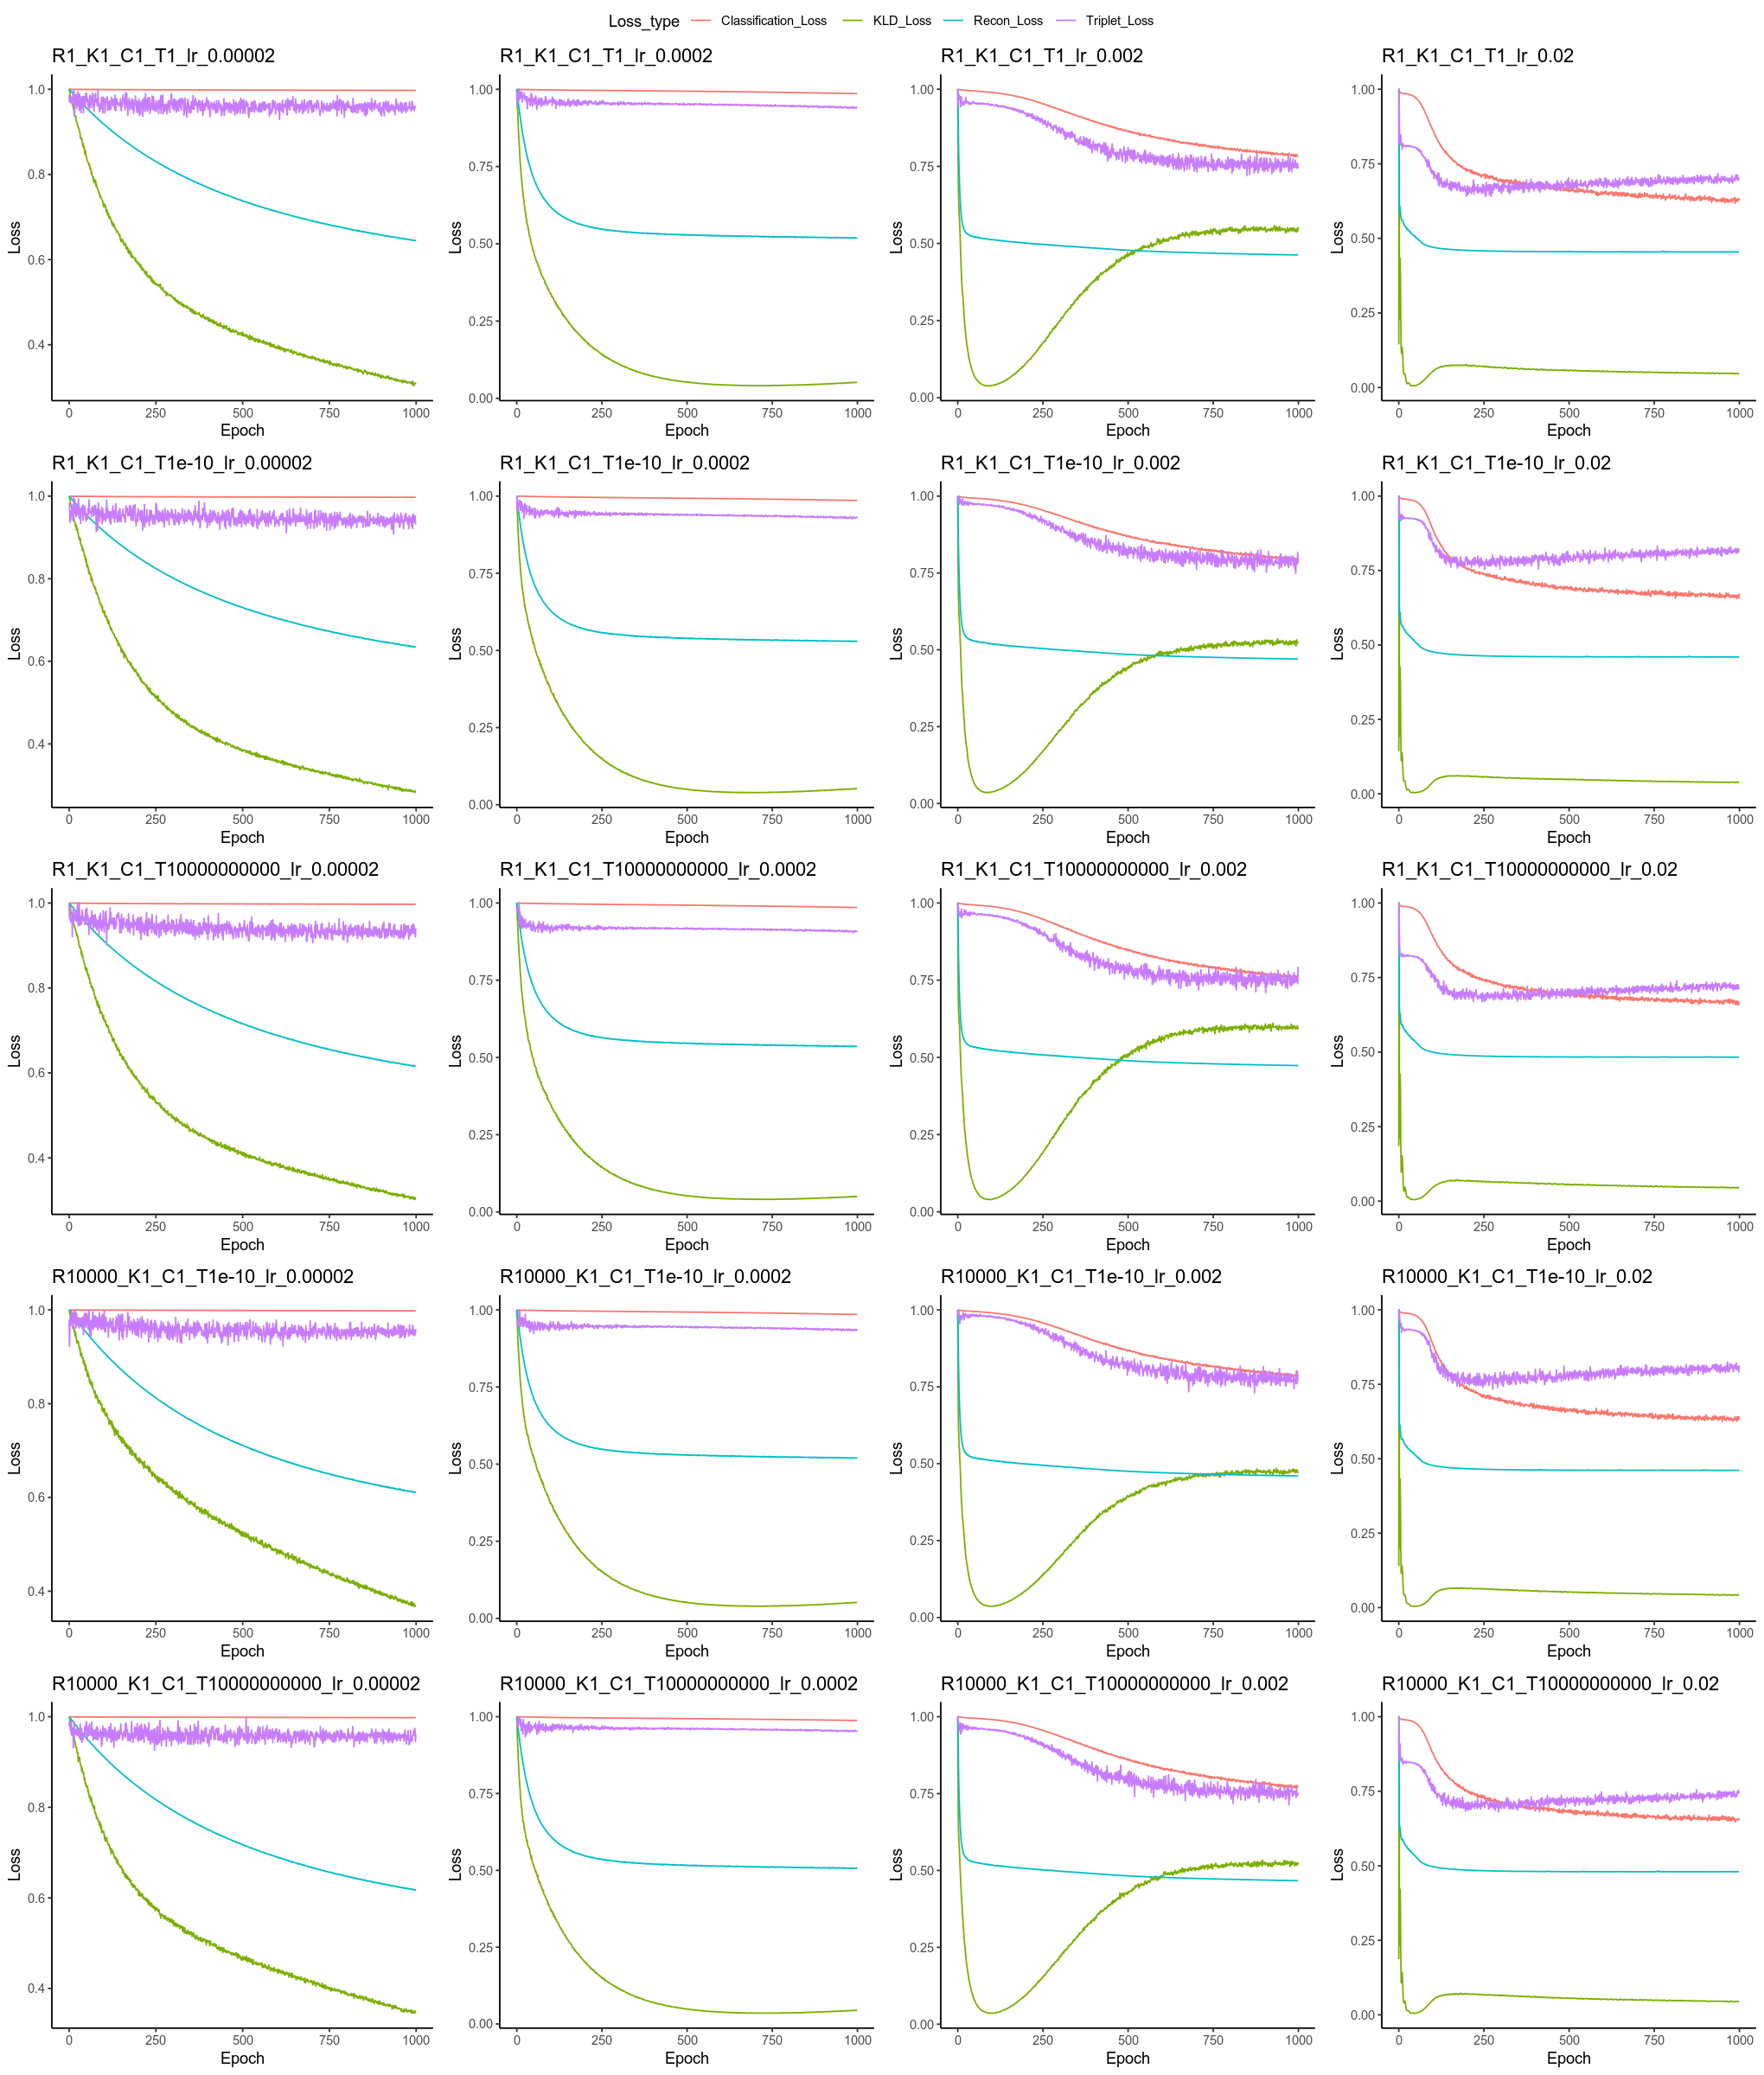

In [12]:
options(repr.plot.width=17, repr.plot.height=20)
ggpubr::ggarrange(plotlist = final_individual_loss_plots, nrow = 5, ncol = 4, common.legend = TRUE)

In [ ]:
## clearly learning rate needs to be lowered -- also can increase batch size to all cells since <2k cells total